# Viendo los min2 de los aot-solventes

# aot-agua2

# viendo energia agua-alone

In [1]:
import pandas as pd

path = "/home/antonio/SIMS/agua-alone/salida.out"

f = open(path, 'r')

for line in f:
    
    if "Total DFT" in line:
        print(line)        
        
        
f.close()

         Total DFT energy =      -76.457865652715



# viendo energia aot-alone

In [2]:
import pandas as pd

path = "/home/antonio/SIMS/aot-alone/salida.out"

f = open(path, 'r')

for line in f:
    
    if "Total DFT" in line:
        print(line)        
        
        
f.close()

         Total DFT energy =    -1321.244893630513



# aot-agua2 

refP e[-1]-1397.737312039932
refP A + B: -1397.702759283228
S         -1.1119509     -2.1266374     -0.3541703
Na        -1.5604766     11.8239105     -0.3929405
O         2.5569515      0.6498300     -0.8713028
O         0.3965055      0.4211043      1.6936117
O         3.8463053     -0.8558413      0.2148734
O         -1.1105147      1.0791943      0.1435276
O         -0.4762483     -3.3288389     -1.0290696
O         -1.3107505     -2.4816226      1.1059087
O         -2.2838120     -1.5738780     -1.0371723
C         2.6785135     -0.4073362     -0.2913840
C         1.5711893     -1.4180391     -0.0606543
C         0.2028643     -0.8233567     -0.3741039
C         -0.1440224      0.2823456      0.6171507
C         -1.5329409      2.1302691      1.0278773
C         4.9700589      0.0230504      0.0358782
H         1.6125757     -1.7513571      0.9799937
H         1.7529791     -2.2856249     -0.7032864
H         0.1686186     -0.4199216     -1.3884888
H         -2.3204845      2.6599

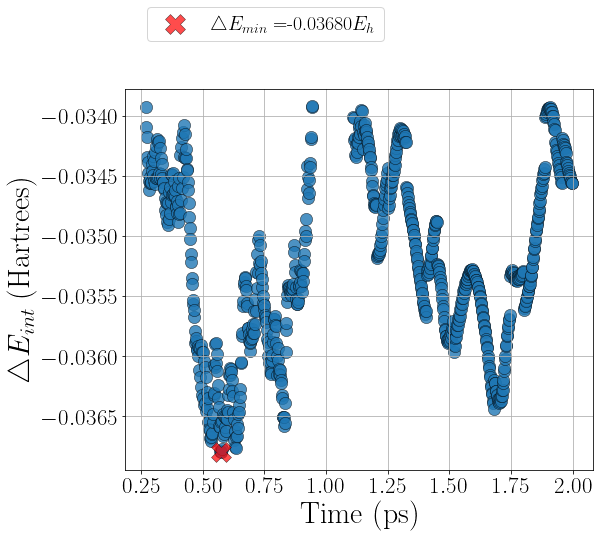

aot-agua2-bg.pdf


In [2]:
import numpy as np
import sys
sys.path.append('../code/')
from herramientas import *
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) 
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"


herr = herramientas()

path_grl0 = "/home/antonio/SIMS/aot-agua2"

plabel = "agua2"

path_salida = os.path.join(path_grl0, "salida.out")
path = path_salida
txt_2find = "Total DFT energy"

N = 27
au2aFactor = 0.5291771057875306

dic2 = defaultdict(dict)

dfxyz_ = pd.DataFrame({})
idy = 0 # frames
f = open(path, 'r')
# f = open(path, 'r', encoding='utf-8')
# fdata = codecs.open(path, 'r', encoding='utf-8', errors='ignore') 

for line in f:
    
    if txt_2find in line:
        energy = line.split()[4]
        dic2["energy"][idy] = float(energy)
    
    if "DFT ENERGY GRADIENTS" in line:
        line = next(f)
        line = next(f)
        line = next(f)
        
        dic = defaultdict(dict)
        
        idx=0
        for i in range(N):
            line = next(f)
            sp = line.split()
            
            ida = sp[0]
            atom = sp[1]
            x = sp[2]
            y = sp[3]
            z = sp[4]
            fx = sp[5]
            fy = sp[6]
            fz = sp[7]
            
            dic["ida"][idx] = ida
            dic["atom"][idx] = atom
            dic["x"][idx] = float(x)*au2aFactor
            dic["y"][idx] = float(y)*au2aFactor
            dic["z"][idx] = float(z)*au2aFactor
            dic["fx"][idx] = float(fx)
            dic["fy"][idx] = float(fy)
            dic["fz"][idx] = float(fz)        
            dic["frame"][idx] = idy  
            
            idx+=1
            
        dfxyz = pd.DataFrame(dic)
        dfxyz_ = pd.concat([dfxyz_, dfxyz], ignore_index=True)        
 
        cm_vMol = herr.get_CM_from_frame(df=dfxyz.loc[24:]).values 
        vS = dfxyz[["x", "y", "z"]].loc[0].values 
        d = np.linalg.norm(cm_vMol - vS)        
        
        dic2["distance"][idy] = float(d)
        
        
        idy+=1
        
        
        
f.close() 

fig = plt.figure()
ax = plt.gca()

df = pd.DataFrame(dic2)

df2 = df.copy()

refP = df2["energy"].iloc[-1]
print(f"refP e[-1]{refP}")

refP = (-1321.244893630513) + (-76.457865652715)
print(f"refP A + B: {refP}")

# df2 = df2.loc[5:]
# df2 = df2[(df2["energy"] - refP)  < -0.02 ]

d = df2["distance"].values
e = df2["energy"].values - refP

df_mpkl = dfxyz_.copy()  # <=======


tmp_df = df_mpkl[df_mpkl["frame"] == df.loc[df[['energy']].idxmin()].index[0]].copy()
tmp_df.loc[:,'ida'] = tmp_df['ida'].astype(int)
tmp_df = tmp_df.set_index('ida')

for idx in tmp_df.index:
    
    symbol = tmp_df["atom"].loc[idx]
    x, y, z = tmp_df[["x", "y", "z"]].loc[idx].values
    print(f"{symbol:<10}{x:.7f}{y:15.7f}{z:15.7f}")
    

df.loc[df[['energy']].idxmin()]





markers = ["v", "P", "X", "^"]


df = df.set_index(2*df.index.values/1e3)
df2 = df2.set_index(2*df2.index.values/1e3)

frames = df.index.values

# from
# c = max + (min-max)/2
# so
# c = min +max/2

c = (df2["energy"].min() + df2["energy"].max())/2.0
df3 = df2[df2["energy"] < c].copy()

# df3 = df2.copy()

frames = df3.index.values
e = df3["energy"].values - refP

# plt.scatter(frames, e, s=150, edgecolors='black', label=f"AOT-MeOH", alpha=0.8, linewidth=0.5)
plt.scatter(frames, e, s=150, edgecolors='black', alpha=0.8, linewidth=0.5)


#################################################


xmin = df.loc[df[['energy']].idxmin()].iloc[0].name
ymin = df.loc[df[['energy']].idxmin()]["energy"].iloc[0]
print(f"ymin {ymin}")
ymin =  ymin - refP
print(f"ymin - refP: {ymin}")

xmin_label = np.round(xmin, decimals=4)
ymin_label = np.round(ymin, decimals=5)

txt1 = r"$t_{min}=$"
txt2 = r"$\triangle E_{min}=$"
# plt.scatter(xmin, ymin, label=f"{txt1}" + f"{xmin_label:.2f} fs, " + f"{txt2}" + f"{ymin_label:.4f}" + "$ E_{h}$",
#             alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)

plt.scatter(xmin, ymin, label=f"{txt2}" + f"{ymin_label:.5f}" + "$ E_{h}$",
            alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)




# plt.scatter(frames, e, s=50, label="B3LYP/6-31G**")


plt.xlabel("Time (ps)", fontsize=30)
plt.ylabel(r"$\triangle E_{int}$  (Hartrees)", fontsize=30)
plt.grid()

fw = 6
fh = 5
ff = fw/fh

fh = 7
fw = fh*ff

fig.set_size_inches(fw, fh)

plt.legend(fontsize=20)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)


ax.legend(loc='lower center', fontsize=20,  bbox_to_anchor=(0.3,1.1))

plt.show()

name_plot = f"aot-{plabel}-bg-time.pdf"
name_plot = f"aot-{plabel}-bg.pdf"
fig.savefig(name_plot, format="pdf", bbox_inches='tight')
print(name_plot)



In [ ]:
# Info) ------------
# Info) molecule id: 0
# Info) trajectory frame: 0
# Info) name: O
# Info) type: O
# Info) index: 6
# Info) residue: 0
# Info) resname: 
# Info) resid: 1
# Info) chain: X
# Info) segname: 
# Info) x: -1.310750
# Info) y: -2.481623
# Info) z: 1.105909
# Info) Added new Atoms label 1:O
# Info) picked atom: 
# Info) ------------
# Info) molecule id: 0
# Info) trajectory frame: 0
# Info) name: H
# Info) type: H
# Info) index: 25
# Info) residue: 1
# Info) resname: 
# Info) resid: 1
# Info) chain: X
# Info) segname: 
# Info) x: -1.602119
# Info) y: -4.128499
# Info) z: 1.741184
# Info) Added new Atoms label 1:H
# Info) Added new Bonds label 1:O/1:H = 1.789042


In [3]:
# Info) ------------
# Info) molecule id: 0
# Info) trajectory frame: 0
# Info) name: H
# Info) type: H
# Info) index: 25
# Info) residue: 1
# Info) resname: 
# Info) resid: 1
# Info) chain: X
# Info) segname: 
# Info) x: -1.602119
# Info) y: -4.128499
# Info) z: 1.741184
# Info) picked atom: 
# Info) ------------
# Info) molecule id: 0
# Info) trajectory frame: 0
# Info) name: O
# Info) type: O
# Info) index: 6
# Info) residue: 0
# Info) resname: 
# Info) resid: 1
# Info) chain: X
# Info) segname: 
# Info) x: -1.310750
# Info) y: -2.481623
# Info) z: 1.105909
# Info) Added new Angles label 1:O/1:H/1:O = 168.821854
# Info) picked atom: 
# Info) ------------
# Info) molecule id: 0
# Info) trajectory frame: 0
# Info) name: H
# Info) type: H
# Info) index: 24
# Info) residue: 1
# Info) resname: 
# Info) resid: 1
# Info) chain: X
# Info) segname: 
# Info) x: -1.220208
# Info) y: -5.536133
# Info) z: 1.294842


# viendo forma alone 2

In [4]:
import pandas as pd

path = "/home/antonio/SIMS/forma-alone/salida.out"

f = open(path, 'r')

for line in f:
    
    if "Total DFT" in line:
        print(line)        
        
        
f.close()

         Total DFT energy =     -169.953556352555



# aot-forma 2

refP e[-1]-1491.215787749431
refP A + B: -1491.198449983068
S         -0.6720856      0.0010991     -0.3262213
Na        7.9632153    -10.9644988     -0.4146552
O         -1.9762780     -4.4052788     -0.8915105
O         -0.3876355     -2.9634616      1.6962015
O         -3.9137447     -3.9676207      0.1872541
O         1.2251604     -2.5853874      0.1590177
O         -1.8929062      0.5983257     -1.0028795
O         -0.7312233      0.3914556      1.1371571
O         0.6032915      0.2572785     -0.9993356
C         -2.7045168     -3.6315626     -0.3087611
C         -2.4138393     -2.1632612     -0.0627964
C         -0.9575857     -1.8276745     -0.3646321
C         -0.0283263     -2.5213617      0.6258445
C         2.1834805     -3.1892631      1.0435140
C         -4.2962005     -5.3400299     -0.0066073
H         -2.6509699     -1.9289707      0.9786321
H         -3.0709021     -1.5666262     -0.7038802
H         -0.6847684     -2.1229289     -1.3801225
H         3.1348351     -3

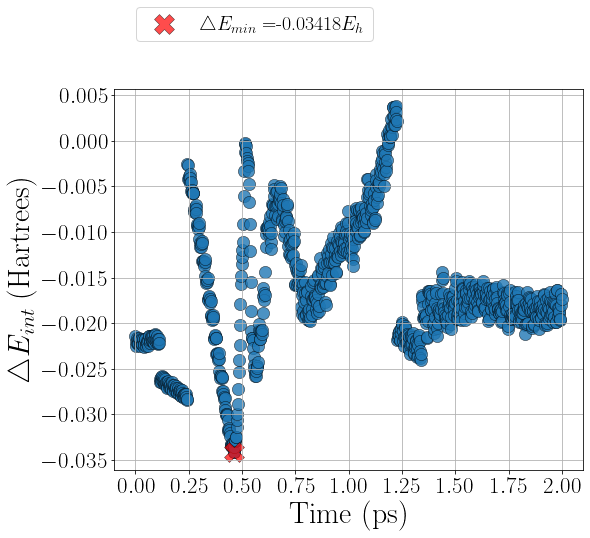

aot-forma1-bg.pdf


In [7]:
import numpy as np
import sys
sys.path.append('../code/')
from herramientas import *
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) 
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"


herr = herramientas()

path_grl0 = "/home/antonio/SIMS/aot-forma2"

plabel = "forma1"

path_salida = os.path.join(path_grl0, "salida.out")
path = path_salida
txt_2find = "Total DFT energy"

N = 30
au2aFactor = 0.5291771057875306

dic2 = defaultdict(dict)

dfxyz_ = pd.DataFrame({})
idy = 0 # frames
f = open(path, 'r')
# f = open(path, 'r', encoding='utf-8')
# fdata = codecs.open(path, 'r', encoding='utf-8', errors='ignore') 

for line in f:
    
    if txt_2find in line:
        energy = line.split()[4]
        dic2["energy"][idy] = float(energy)
    
    if "DFT ENERGY GRADIENTS" in line:
        line = next(f)
        line = next(f)
        line = next(f)
        
        dic = defaultdict(dict)
        
        idx=0
        for i in range(N):
            line = next(f)
            sp = line.split()
            
            ida = sp[0]
            atom = sp[1]
            x = sp[2]
            y = sp[3]
            z = sp[4]
            fx = sp[5]
            fy = sp[6]
            fz = sp[7]
            
            dic["ida"][idx] = ida
            dic["atom"][idx] = atom
            dic["x"][idx] = float(x)*au2aFactor
            dic["y"][idx] = float(y)*au2aFactor
            dic["z"][idx] = float(z)*au2aFactor
            dic["fx"][idx] = float(fx)
            dic["fy"][idx] = float(fy)
            dic["fz"][idx] = float(fz)        
            dic["frame"][idx] = idy  
            
            idx+=1
            
        dfxyz = pd.DataFrame(dic)
        dfxyz_ = pd.concat([dfxyz_, dfxyz], ignore_index=True)        
 
        cm_vMol = herr.get_CM_from_frame(df=dfxyz.loc[24:]).values 
        vS = dfxyz[["x", "y", "z"]].loc[0].values 
        d = np.linalg.norm(cm_vMol - vS)        
        
        dic2["distance"][idy] = float(d)
        
        
        idy+=1
        
        
        
f.close() 

fig = plt.figure()
ax = plt.gca()

df = pd.DataFrame(dic2)

df2 = df.copy()

refP = df2["energy"].iloc[-1]
print(f"refP e[-1]{refP}")

refP = (-1321.244893630513) + (-169.953556352555) # forma E alone no def
print(f"refP A + B: {refP}")

# df2 = df2.loc[5:]
# df2 = df2[(df2["energy"] - refP)  < -0.02 ]

d = df2["distance"].values
e = df2["energy"].values - refP

df_mpkl = dfxyz_.copy()  # <=======


tmp_df = df_mpkl[df_mpkl["frame"] == df.loc[df[['energy']].idxmin()].index[0]].copy()
tmp_df.loc[:,'ida'] = tmp_df['ida'].astype(int)
tmp_df = tmp_df.set_index('ida')

for idx in tmp_df.index:
    
    symbol = tmp_df["atom"].loc[idx]
    x, y, z = tmp_df[["x", "y", "z"]].loc[idx].values
    print(f"{symbol:<10}{x:.7f}{y:15.7f}{z:15.7f}")
    

df.loc[df[['energy']].idxmin()]





markers = ["v", "P", "X", "^"]


df = df.set_index(2*df.index.values/1e3)
df2 = df2.set_index(2*df2.index.values/1e3)

frames = df.index.values

# from
# c = max + (min-max)/2
# so
# c = min +max/2

# c = (df2["energy"].min() + df2["energy"].max())/2.0
# df3 = df2[df2["energy"] < c].copy()

df3 = df2.copy()

frames = df3.index.values
e = df3["energy"].values - refP

# plt.scatter(frames, e, s=150, edgecolors='black', label=f"AOT-MeOH", alpha=0.8, linewidth=0.5)
plt.scatter(frames, e, s=150, edgecolors='black', alpha=0.8, linewidth=0.5)


#################################################


xmin = df.loc[df[['energy']].idxmin()].iloc[0].name
ymin = df.loc[df[['energy']].idxmin()]["energy"].iloc[0]
print(f"ymin {ymin}")
ymin =  ymin - refP
print(f"ymin - refP: {ymin}")

xmin_label = np.round(xmin, decimals=4)
ymin_label = np.round(ymin, decimals=5)

txt1 = r"$t_{min}=$"
txt2 = r"$\triangle E_{min}=$"
# plt.scatter(xmin, ymin, label=f"{txt1}" + f"{xmin_label:.2f} fs, " + f"{txt2}" + f"{ymin_label:.4f}" + "$ E_{h}$",
#             alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)

plt.scatter(xmin, ymin, label=f"{txt2}" + f"{ymin_label:.5f}" + "$ E_{h}$",
            alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)




# plt.scatter(frames, e, s=50, label="B3LYP/6-31G**")


plt.xlabel("Time (ps)", fontsize=30)
plt.ylabel(r"$\triangle E_{int}$  (Hartrees)", fontsize=30)
plt.grid()

fw = 6
fh = 5
ff = fw/fh

fh = 7
fw = fh*ff

fig.set_size_inches(fw, fh)

plt.legend(fontsize=20)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)


ax.legend(loc='lower center', fontsize=20,  bbox_to_anchor=(0.3,1.1))

plt.show()

name_plot = f"aot-{plabel}-bg-time.pdf"
name_plot = f"aot-{plabel}-bg.pdf"
fig.savefig(name_plot, format="pdf", bbox_inches='tight')
print(name_plot)



# ok esa era min1, ahora min 2 ~ aot-forma-from-min

refP e[-1]-1491.237558433726
refP A + B: -1491.198449983068
S         0.3085928      1.6963217     -0.2703619
Na        3.7440434    -11.8309988     -0.4429858
O         -2.6652815     -1.7938379     -0.9120076
O         -0.6645660     -1.1476693      1.7106899
O         -4.2727612     -0.6170792      0.1557723
O         0.9842837     -1.4426680      0.1936746
O         -0.5545654      2.7447596     -0.9490791
O         0.3925346      2.0626710      1.1980337
O         1.5874440      1.4186132     -0.9282095
C         -3.0244715     -0.7967095     -0.3245194
C         -2.1657901      0.4241974     -0.0543724
C         -0.6947413      0.1419047     -0.3381934
C         -0.1415475     -0.8792955      0.6501560
C         1.6019551     -2.3925732      1.0777194
C         -5.1770862     -1.7135686     -0.0616920
H         -2.3020252      0.7244556      0.9882007
H         -2.5146401      1.2427169     -0.6924700
H         -0.5510903     -0.2287167     -1.3554480
H         2.4971069     -2.7

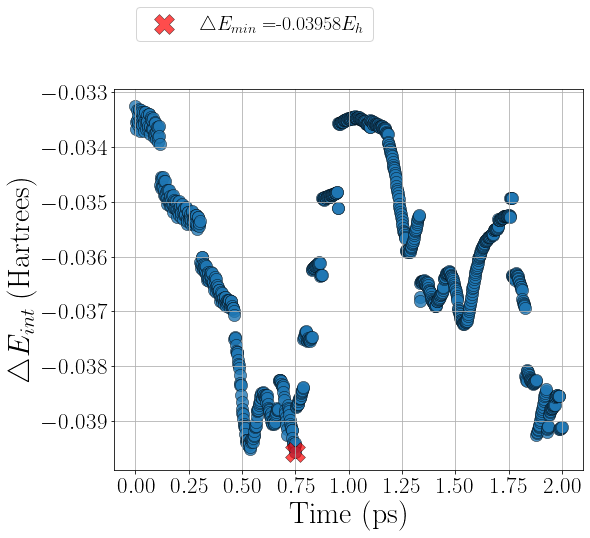

aot-forma2-bg.pdf


In [5]:
import numpy as np
import sys
sys.path.append('../code/')
from herramientas import *
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) 
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"


herr = herramientas()

path_grl0 = "/home/antonio/SIMS/aot-forma-from-min"

plabel = "forma2"

path_salida = os.path.join(path_grl0, "salida.out")
path = path_salida
txt_2find = "Total DFT energy"

N = 30
au2aFactor = 0.5291771057875306

dic2 = defaultdict(dict)

dfxyz_ = pd.DataFrame({})
idy = 0 # frames
f = open(path, 'r')
# f = open(path, 'r', encoding='utf-8')
# fdata = codecs.open(path, 'r', encoding='utf-8', errors='ignore') 

for line in f:
    
    if txt_2find in line:
        energy = line.split()[4]
        dic2["energy"][idy] = float(energy)
    
    if "DFT ENERGY GRADIENTS" in line:
        line = next(f)
        line = next(f)
        line = next(f)
        
        dic = defaultdict(dict)
        
        idx=0
        for i in range(N):
            line = next(f)
            sp = line.split()
            
            ida = sp[0]
            atom = sp[1]
            x = sp[2]
            y = sp[3]
            z = sp[4]
            fx = sp[5]
            fy = sp[6]
            fz = sp[7]
            
            dic["ida"][idx] = ida
            dic["atom"][idx] = atom
            dic["x"][idx] = float(x)*au2aFactor
            dic["y"][idx] = float(y)*au2aFactor
            dic["z"][idx] = float(z)*au2aFactor
            dic["fx"][idx] = float(fx)
            dic["fy"][idx] = float(fy)
            dic["fz"][idx] = float(fz)        
            dic["frame"][idx] = idy  
            
            idx+=1
            
        dfxyz = pd.DataFrame(dic)
        dfxyz_ = pd.concat([dfxyz_, dfxyz], ignore_index=True)        
 
        cm_vMol = herr.get_CM_from_frame(df=dfxyz.loc[24:]).values 
        vS = dfxyz[["x", "y", "z"]].loc[0].values 
        d = np.linalg.norm(cm_vMol - vS)        
        
        dic2["distance"][idy] = float(d)
        
        
        idy+=1
        
        
        
f.close() 

fig = plt.figure()
ax = plt.gca()

df = pd.DataFrame(dic2)

df2 = df.copy()

refP = df2["energy"].iloc[-1]
print(f"refP e[-1]{refP}")

refP = (-1321.244893630513) + (-169.953556352555) # forma E alone no def
print(f"refP A + B: {refP}")

# df2 = df2.loc[5:]
# df2 = df2[(df2["energy"] - refP)  < -0.02 ]

d = df2["distance"].values
e = df2["energy"].values - refP

df_mpkl = dfxyz_.copy()  # <=======


tmp_df = df_mpkl[df_mpkl["frame"] == df.loc[df[['energy']].idxmin()].index[0]].copy()
tmp_df.loc[:,'ida'] = tmp_df['ida'].astype(int)
tmp_df = tmp_df.set_index('ida')

for idx in tmp_df.index:
    
    symbol = tmp_df["atom"].loc[idx]
    x, y, z = tmp_df[["x", "y", "z"]].loc[idx].values
    print(f"{symbol:<10}{x:.7f}{y:15.7f}{z:15.7f}")
    

df.loc[df[['energy']].idxmin()]





markers = ["v", "P", "X", "^"]


df = df.set_index(2*df.index.values/1e3)
df2 = df2.set_index(2*df2.index.values/1e3)

frames = df.index.values

# from
# c = max + (min-max)/2
# so
# c = min +max/2

# c = (df2["energy"].min() + df2["energy"].max())/2.0
# df3 = df2[df2["energy"] < c].copy()

df3 = df2.copy()

frames = df3.index.values
e = df3["energy"].values - refP

# plt.scatter(frames, e, s=150, edgecolors='black', label=f"AOT-MeOH", alpha=0.8, linewidth=0.5)
plt.scatter(frames, e, s=150, edgecolors='black', alpha=0.8, linewidth=0.5)


#################################################


xmin = df.loc[df[['energy']].idxmin()].iloc[0].name
ymin = df.loc[df[['energy']].idxmin()]["energy"].iloc[0]
print(f"ymin {ymin}")
ymin =  ymin - refP
print(f"ymin - refP: {ymin}")

xmin_label = np.round(xmin, decimals=4)
ymin_label = np.round(ymin, decimals=5)

txt1 = r"$t_{min}=$"
txt2 = r"$\triangle E_{min}=$"
# plt.scatter(xmin, ymin, label=f"{txt1}" + f"{xmin_label:.2f} fs, " + f"{txt2}" + f"{ymin_label:.4f}" + "$ E_{h}$",
#             alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)

plt.scatter(xmin, ymin, label=f"{txt2}" + f"{ymin_label:.5f}" + "$ E_{h}$",
            alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)




# plt.scatter(frames, e, s=50, label="B3LYP/6-31G**")


plt.xlabel("Time (ps)", fontsize=30)
plt.ylabel(r"$\triangle E_{int}$  (Hartrees)", fontsize=30)
plt.grid()

fw = 6
fh = 5
ff = fw/fh

fh = 7
fw = fh*ff

fig.set_size_inches(fw, fh)

plt.legend(fontsize=20)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)


ax.legend(loc='lower center', fontsize=20,  bbox_to_anchor=(0.3,1.1))

plt.show()

name_plot = f"aot-{plabel}-bg-time.pdf"
name_plot = f"aot-{plabel}-bg.pdf"
fig.savefig(name_plot, format="pdf", bbox_inches='tight')
print(name_plot)



# viendo aot-eg-2

In [11]:
import pandas as pd

path = "/home/antonio/SIMS/eg-alone/salida.out"

f = open(path, 'r')

for line in f:
    
    if "Total DFT" in line:
        print(line)        
        
        
f.close()

         Total DFT energy =     -230.330038311198



refP e[-1]-1551.611894667788
refP A + B: -1551.574931941711
S         0.0983513      1.4051319     -0.3280030
Na        4.0111582    -11.9914130     -0.5340170
O         -2.7632941     -2.1919802     -0.8832585
O         -0.7236703     -1.4625519      1.6870754
O         -4.3854695     -1.0685287      0.2192354
O         0.8972081     -1.7055119      0.1311640
O         -0.8181247      2.4189093     -0.9892088
O         0.2048714      1.7809990      1.1364983
O         1.3698040      1.1702392     -1.0160465
C         -3.1435845     -1.2055935     -0.2908585
C         -2.3228451      0.0465020     -0.0464337
C         -0.8499405     -0.1843828     -0.3653211
C         -0.2366152     -1.1805941      0.6130644
C         1.5699219     -2.6286005      1.0033113
C         -5.2548583     -2.1976222      0.0281877
H         -2.4442479      0.3464231      0.9980084
H         -2.7163000      0.8489393     -0.6788771
H         -0.7180573     -0.5543829     -1.3843395
H         2.4637576     -2.9

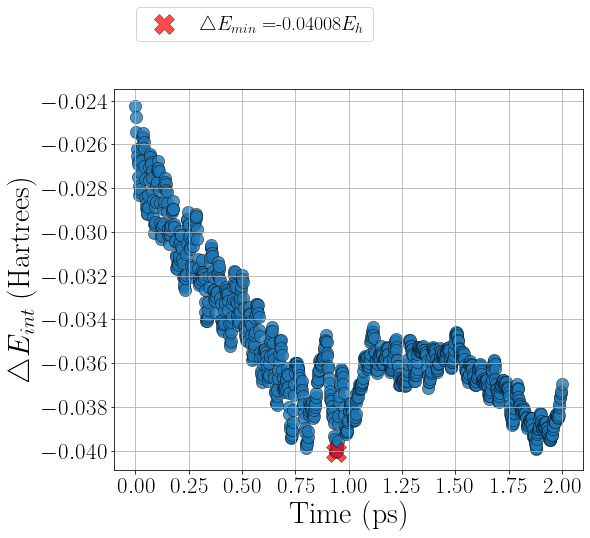

aot-eg2-bg.pdf


In [4]:
import numpy as np
import sys
sys.path.append('../code/')
from herramientas import *
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) 
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"


herr = herramientas()

path_grl0 = "/home/antonio/SIMS/aot-eg-2"

plabel = "eg2"

path_salida = os.path.join(path_grl0, "salida.out")
path = path_salida
txt_2find = "Total DFT energy"

N = 34
au2aFactor = 0.5291771057875306

dic2 = defaultdict(dict)

dfxyz_ = pd.DataFrame({})
idy = 0 # frames
f = open(path, 'r')
# f = open(path, 'r', encoding='utf-8')
# fdata = codecs.open(path, 'r', encoding='utf-8', errors='ignore') 

for line in f:
    
    if txt_2find in line:
        energy = line.split()[4]
        dic2["energy"][idy] = float(energy)
    
    if "DFT ENERGY GRADIENTS" in line:
        line = next(f)
        line = next(f)
        line = next(f)
        
        dic = defaultdict(dict)
        
        idx=0
        for i in range(N):
            line = next(f)
            sp = line.split()
            
            ida = sp[0]
            atom = sp[1]
            x = sp[2]
            y = sp[3]
            z = sp[4]
            fx = sp[5]
            fy = sp[6]
            fz = sp[7]
            
            dic["ida"][idx] = ida
            dic["atom"][idx] = atom
            dic["x"][idx] = float(x)*au2aFactor
            dic["y"][idx] = float(y)*au2aFactor
            dic["z"][idx] = float(z)*au2aFactor
            dic["fx"][idx] = float(fx)
            dic["fy"][idx] = float(fy)
            dic["fz"][idx] = float(fz)        
            dic["frame"][idx] = idy  
            
            idx+=1
            
        dfxyz = pd.DataFrame(dic)
        dfxyz_ = pd.concat([dfxyz_, dfxyz], ignore_index=True)        
 
        cm_vMol = herr.get_CM_from_frame(df=dfxyz.loc[24:]).values 
        vS = dfxyz[["x", "y", "z"]].loc[0].values 
        d = np.linalg.norm(cm_vMol - vS)        
        
        dic2["distance"][idy] = float(d)
        
        
        idy+=1
        
        
        
f.close() 

fig = plt.figure()
ax = plt.gca()

df = pd.DataFrame(dic2)

df2 = df.copy()

refP = df2["energy"].iloc[-1]
print(f"refP e[-1]{refP}")

refP = (-1321.244893630513) + (-230.330038311198) # forma E alone no def
print(f"refP A + B: {refP}")

# df2 = df2.loc[5:]
# df2 = df2[(df2["energy"] - refP)  < -0.02 ]

d = df2["distance"].values
e = df2["energy"].values - refP

df_mpkl = dfxyz_.copy()  # <=======


tmp_df = df_mpkl[df_mpkl["frame"] == df.loc[df[['energy']].idxmin()].index[0]].copy()
tmp_df.loc[:,'ida'] = tmp_df['ida'].astype(int)
tmp_df = tmp_df.set_index('ida')

for idx in tmp_df.index:
    
    symbol = tmp_df["atom"].loc[idx]
    x, y, z = tmp_df[["x", "y", "z"]].loc[idx].values
    print(f"{symbol:<10}{x:.7f}{y:15.7f}{z:15.7f}")
    

df.loc[df[['energy']].idxmin()]





markers = ["v", "P", "X", "^"]


df = df.set_index(2*df.index.values/1e3)
df2 = df2.set_index(2*df2.index.values/1e3)

frames = df.index.values

# from
# c = max + (min-max)/2
# so
# c = min +max/2

# c = (df2["energy"].min() + df2["energy"].max())/2.0
# df3 = df2[df2["energy"] < c].copy()

df3 = df2.copy()

frames = df3.index.values
e = df3["energy"].values - refP

# plt.scatter(frames, e, s=150, edgecolors='black', label=f"AOT-MeOH", alpha=0.8, linewidth=0.5)
plt.scatter(frames, e, s=150, edgecolors='black', alpha=0.8, linewidth=0.5)


#################################################


xmin = df.loc[df[['energy']].idxmin()].iloc[0].name
ymin = df.loc[df[['energy']].idxmin()]["energy"].iloc[0]
print(f"ymin {ymin}")
ymin =  ymin - refP
print(f"ymin - refP: {ymin}")

xmin_label = np.round(xmin, decimals=4)
ymin_label = np.round(ymin, decimals=5)

txt1 = r"$t_{min}=$"
txt2 = r"$\triangle E_{min}=$"
# plt.scatter(xmin, ymin, label=f"{txt1}" + f"{xmin_label:.2f} fs, " + f"{txt2}" + f"{ymin_label:.4f}" + "$ E_{h}$",
#             alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)

plt.scatter(xmin, ymin, label=f"{txt2}" + f"{ymin_label:.5f}" + "$ E_{h}$",
            alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)




# plt.scatter(frames, e, s=50, label="B3LYP/6-31G**")


plt.xlabel("Time (ps)", fontsize=30)
plt.ylabel(r"$\triangle E_{int}$  (Hartrees)", fontsize=30)
plt.grid()

fw = 6
fh = 5
ff = fw/fh

fh = 7
fw = fh*ff

fig.set_size_inches(fw, fh)

plt.legend(fontsize=20)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)


ax.legend(loc='lower center', fontsize=20,  bbox_to_anchor=(0.3,1.1))

plt.show()

name_plot = f"aot-{plabel}-bg-time.pdf"
name_plot = f"aot-{plabel}-bg.pdf"
fig.savefig(name_plot, format="pdf", bbox_inches='tight')
print(name_plot)



In [ ]:
# Info) ------------
# Info) molecule id: 0
# Info) trajectory frame: 0
# Info) name: O
# Info) type: O
# Info) index: 6
# Info) residue: 0
# Info) resname: 
# Info) resid: 1
# Info) chain: X
# Info) segname: 
# Info) x: 0.204871
# Info) y: 1.780999
# Info) z: 1.136498
# Info) Added new Atoms label 1:O
# Info) picked atom: 
# Info) ------------
# Info) molecule id: 0
# Info) trajectory frame: 0
# Info) name: H
# Info) type: H
# Info) index: 27
# Info) residue: 1
# Info) resname: 
# Info) resid: 1
# Info) chain: X
# Info) segname: 
# Info) x: -0.427373
# Info) y: 2.657107
# Info) z: 2.496859
# Info) Added new Atoms label 1:H
# Info) Added new Bonds label 1:O/1:H = 1.737204


# dmf

# dmf alone 

In [16]:
import pandas as pd

path = "/home/antonio/SIMS/dms-alone/salida.out"

f = open(path, 'r')

for line in f:
    
    if "Total DFT" in line:
        print(line)        
        
        
f.close()

         Total DFT energy =     -553.249445564055



In [13]:
import pandas as pd

path = "/home/antonio/SIMS/dmf-alone/salida.out"

f = open(path, 'r')

for line in f:
    
    if "Total DFT" in line:
        print(line)        
        
        
f.close()

         Total DFT energy =     -248.589025296097



refP e[-1]-1568.527308724829
refP A + B: -1569.8339189266098
S         0.1168714      1.1550751     -0.4575514
Na        4.0466142    -12.2357352     -0.2026129
O         -2.7476204     -2.4636248     -0.8267239
O         -0.6688396     -1.6325018      1.6805612
O         -4.3539750     -1.2994367      0.2565699
O         0.9276570     -1.9345667      0.1098683
O         -0.8115307      2.1414400     -1.1433046
O         0.2458636      1.5879891      0.9892559
O         1.3776898      0.8947136     -1.1559720
C         -3.1200436     -1.4552767     -0.2673286
C         -2.2975177     -0.1938143     -0.0850070
C         -0.8294904     -0.4355657     -0.4178330
C         -0.1992315     -1.3922750      0.5888069
C         1.6154729     -2.8222391      1.0066531
C         -5.2245915     -2.4360499      0.1234665
H         -2.4029006      0.1466604      0.9487077
H         -2.7021000      0.5830082     -0.7419963
H         -0.7130963     -0.8449879     -1.4237277
H         2.5011223     -3.

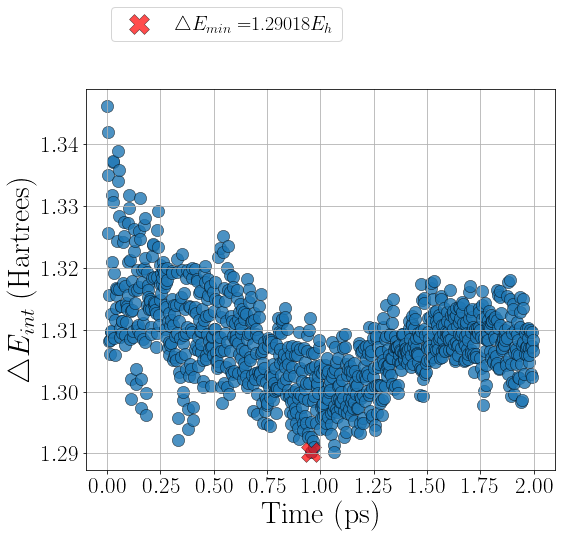

aot-dmf2-bg.pdf


In [7]:
import numpy as np
import sys
sys.path.append('../code/')
from herramientas import *
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) 
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"


herr = herramientas()

path_grl0 = "/home/antonio/SIMS/aot-dmf-2"

plabel = "dmf2"

path_salida = os.path.join(path_grl0, "salida.out")
path = path_salida
txt_2find = "Total DFT energy"

N = 34
au2aFactor = 0.5291771057875306

dic2 = defaultdict(dict)

dfxyz_ = pd.DataFrame({})
idy = 0 # frames
f = open(path, 'r')
# f = open(path, 'r', encoding='utf-8')
# fdata = codecs.open(path, 'r', encoding='utf-8', errors='ignore') 

for line in f:
    
    if txt_2find in line:
        energy = line.split()[4]
        dic2["energy"][idy] = float(energy)
    
    if "DFT ENERGY GRADIENTS" in line:
        line = next(f)
        line = next(f)
        line = next(f)
        
        dic = defaultdict(dict)
        
        idx=0
        for i in range(N):
            line = next(f)
            sp = line.split()
            
            ida = sp[0]
            atom = sp[1]
            x = sp[2]
            y = sp[3]
            z = sp[4]
            fx = sp[5]
            fy = sp[6]
            fz = sp[7]
            
            dic["ida"][idx] = ida
            dic["atom"][idx] = atom
            dic["x"][idx] = float(x)*au2aFactor
            dic["y"][idx] = float(y)*au2aFactor
            dic["z"][idx] = float(z)*au2aFactor
            dic["fx"][idx] = float(fx)
            dic["fy"][idx] = float(fy)
            dic["fz"][idx] = float(fz)        
            dic["frame"][idx] = idy  
            
            idx+=1
            
        dfxyz = pd.DataFrame(dic)
        dfxyz_ = pd.concat([dfxyz_, dfxyz], ignore_index=True)        
 
        cm_vMol = herr.get_CM_from_frame(df=dfxyz.loc[24:]).values 
        vS = dfxyz[["x", "y", "z"]].loc[0].values 
        d = np.linalg.norm(cm_vMol - vS)        
        
        dic2["distance"][idy] = float(d)
        
        
        idy+=1
        
        
        
f.close() 

fig = plt.figure()
ax = plt.gca()

df = pd.DataFrame(dic2)

df2 = df.copy()

refP = df2["energy"].iloc[-1]
print(f"refP e[-1]{refP}")

refP = (-1321.244893630513) + (-248.589025296097) # forma E alone no def
print(f"refP A + B: {refP}")

# df2 = df2.loc[5:]
# df2 = df2[(df2["energy"] - refP)  < -0.02 ]

d = df2["distance"].values
e = df2["energy"].values - refP

df_mpkl = dfxyz_.copy()  # <=======


tmp_df = df_mpkl[df_mpkl["frame"] == df.loc[df[['energy']].idxmin()].index[0]].copy()
tmp_df.loc[:,'ida'] = tmp_df['ida'].astype(int)
tmp_df = tmp_df.set_index('ida')

for idx in tmp_df.index:
    
    symbol = tmp_df["atom"].loc[idx]
    x, y, z = tmp_df[["x", "y", "z"]].loc[idx].values
    print(f"{symbol:<10}{x:.7f}{y:15.7f}{z:15.7f}")
    

df.loc[df[['energy']].idxmin()]





markers = ["v", "P", "X", "^"]


df = df.set_index(2*df.index.values/1e3)
df2 = df2.set_index(2*df2.index.values/1e3)

frames = df.index.values

# from
# c = max + (min-max)/2
# so
# c = min +max/2

# c = (df2["energy"].min() + df2["energy"].max())/2.0
# df3 = df2[df2["energy"] < c].copy()

df3 = df2.copy()

frames = df3.index.values
e = df3["energy"].values - refP

# plt.scatter(frames, e, s=150, edgecolors='black', label=f"AOT-MeOH", alpha=0.8, linewidth=0.5)
plt.scatter(frames, e, s=150, edgecolors='black', alpha=0.8, linewidth=0.5)


#################################################


xmin = df.loc[df[['energy']].idxmin()].iloc[0].name
ymin = df.loc[df[['energy']].idxmin()]["energy"].iloc[0]
print(f"ymin {ymin}")
ymin =  ymin - refP
print(f"ymin - refP: {ymin}")

xmin_label = np.round(xmin, decimals=4)
ymin_label = np.round(ymin, decimals=5)

txt1 = r"$t_{min}=$"
txt2 = r"$\triangle E_{min}=$"
# plt.scatter(xmin, ymin, label=f"{txt1}" + f"{xmin_label:.2f} fs, " + f"{txt2}" + f"{ymin_label:.4f}" + "$ E_{h}$",
#             alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)

plt.scatter(xmin, ymin, label=f"{txt2}" + f"{ymin_label:.5f}" + "$ E_{h}$",
            alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)




# plt.scatter(frames, e, s=50, label="B3LYP/6-31G**")


plt.xlabel("Time (ps)", fontsize=30)
plt.ylabel(r"$\triangle E_{int}$  (Hartrees)", fontsize=30)
plt.grid()

fw = 6
fh = 5
ff = fw/fh

fh = 7
fw = fh*ff

fig.set_size_inches(fw, fh)

plt.legend(fontsize=20)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)


ax.legend(loc='lower center', fontsize=20,  bbox_to_anchor=(0.3,1.1))

plt.show()

name_plot = f"aot-{plabel}-bg-time.pdf"
name_plot = f"aot-{plabel}-bg.pdf"
fig.savefig(name_plot, format="pdf", bbox_inches='tight')
print(name_plot)



# gl

# gl alone

In [17]:
import pandas as pd

path = "/home/antonio/SIMS/gl-alone/salida.out"

f = open(path, 'r')

for line in f:
    
    if "Total DFT" in line:
        print(line)        
        
        
f.close()

         Total DFT energy =     -344.899959353878



refP e[-1]-1666.188011498739
refP A + B: -1666.144852984391
S         -0.2554449      1.0397187     -0.2060870
Na        4.8427511    -11.9495615     -0.5348980
O         -2.7821423     -2.7934926     -0.8055160
O         -0.8210479     -1.9105183      1.7778594
O         -4.5005296     -1.8312740      0.3035138
O         0.8180491     -1.9912998      0.2241256
O         -1.2578423      1.9740280     -0.8598033
O         -0.1859004      1.4086620      1.2623605
O         1.0332887      0.9267177     -0.8928673
C         -3.2504640     -1.8512832     -0.2043322
C         -2.5456922     -0.5332237      0.0548661
C         -1.0574536     -0.6279787     -0.2620776
C         -0.3591678     -1.5751353      0.7080496
C         1.5691694     -2.8593138      1.0889660
C         -5.2648915     -3.0316900      0.0987847
H         -2.6955239     -0.2560397      1.1020055
H         -3.0082702      0.2372095     -0.5705482
H         -0.8908755     -0.9742632     -1.2843769
H         2.4881923     -3

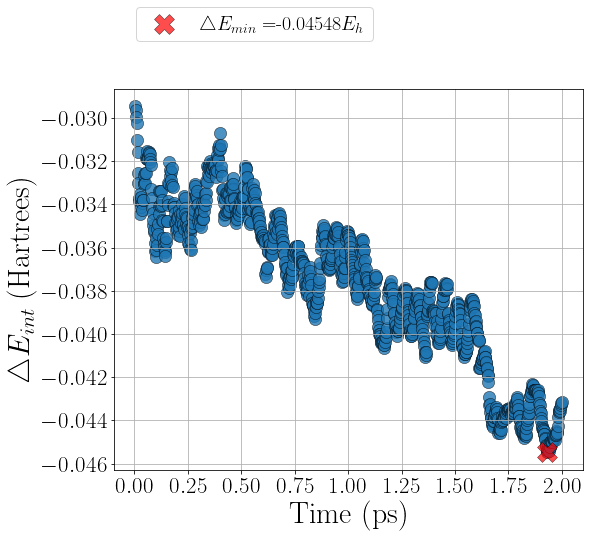

aot-gl2-bg.pdf


In [1]:
import numpy as np
import sys
sys.path.append('../code/')
from herramientas import *
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) 
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"


herr = herramientas()

path_grl0 = "/home/antonio/SIMS/aot-gl-2"

plabel = "gl2"

path_salida = os.path.join(path_grl0, "salida.out")
path = path_salida
txt_2find = "Total DFT energy"

N = 38
au2aFactor = 0.5291771057875306

dic2 = defaultdict(dict)

dfxyz_ = pd.DataFrame({})
idy = 0 # frames
f = open(path, 'r')
# f = open(path, 'r', encoding='utf-8')
# fdata = codecs.open(path, 'r', encoding='utf-8', errors='ignore') 

for line in f:
    
    if txt_2find in line:
        energy = line.split()[4]
        dic2["energy"][idy] = float(energy)
    
    if "DFT ENERGY GRADIENTS" in line:
        line = next(f)
        line = next(f)
        line = next(f)
        
        dic = defaultdict(dict)
        
        idx=0
        for i in range(N):
            line = next(f)
            sp = line.split()
            
            ida = sp[0]
            atom = sp[1]
            x = sp[2]
            y = sp[3]
            z = sp[4]
            fx = sp[5]
            fy = sp[6]
            fz = sp[7]
            
            dic["ida"][idx] = ida
            dic["atom"][idx] = atom
            dic["x"][idx] = float(x)*au2aFactor
            dic["y"][idx] = float(y)*au2aFactor
            dic["z"][idx] = float(z)*au2aFactor
            dic["fx"][idx] = float(fx)
            dic["fy"][idx] = float(fy)
            dic["fz"][idx] = float(fz)        
            dic["frame"][idx] = idy  
            
            idx+=1
            
        dfxyz = pd.DataFrame(dic)
        dfxyz_ = pd.concat([dfxyz_, dfxyz], ignore_index=True)        
 
        cm_vMol = herr.get_CM_from_frame(df=dfxyz.loc[24:]).values 
        vS = dfxyz[["x", "y", "z"]].loc[0].values 
        d = np.linalg.norm(cm_vMol - vS)        
        
        dic2["distance"][idy] = float(d)
        
        
        idy+=1
        
        
        
f.close() 

fig = plt.figure()
ax = plt.gca()

df = pd.DataFrame(dic2)

df2 = df.copy()

refP = df2["energy"].iloc[-1]
print(f"refP e[-1]{refP}")

refP = (-1321.244893630513) + ( -344.899959353878) # forma E alone no def
print(f"refP A + B: {refP}")


# df2 = df2.loc[5:]
# df2 = df2[(df2["energy"] - refP)  < -0.02 ]

d = df2["distance"].values
e = df2["energy"].values - refP

df_mpkl = dfxyz_.copy()  # <=======


tmp_df = df_mpkl[df_mpkl["frame"] == df.loc[df[['energy']].idxmin()].index[0]].copy()
tmp_df.loc[:,'ida'] = tmp_df['ida'].astype(int)
tmp_df = tmp_df.set_index('ida')

for idx in tmp_df.index:
    
    symbol = tmp_df["atom"].loc[idx]
    x, y, z = tmp_df[["x", "y", "z"]].loc[idx].values
    print(f"{symbol:<10}{x:.7f}{y:15.7f}{z:15.7f}")
    

df.loc[df[['energy']].idxmin()]





markers = ["v", "P", "X", "^"]


df = df.set_index(2*df.index.values/1e3)
df2 = df2.set_index(2*df2.index.values/1e3)

frames = df.index.values

# from
# c = max + (min-max)/2
# so
# c = min +max/2

c = df2["energy"].max() + (df2["energy"].min() - df2["energy"].max())*0.3
df3 = df2[df2["energy"] < c].copy()

# df3 = df2.copy()

frames = df3.index.values
e = df3["energy"].values - refP

print(f"e0: {e[0]}")

# plt.scatter(frames, e, s=150, edgecolors='black', label=f"AOT-MeOH", alpha=0.8, linewidth=0.5)
plt.scatter(frames, e, s=150, edgecolors='black', alpha=0.8, linewidth=0.5)


#################################################


xmin = df.loc[df[['energy']].idxmin()].iloc[0].name
ymin = df.loc[df[['energy']].idxmin()]["energy"].iloc[0]
print(f"ymin {ymin}")
ymin =  ymin - refP
print(f"ymin - refP: {ymin}")

xmin_label = np.round(xmin, decimals=4)
ymin_label = np.round(ymin, decimals=5)

txt1 = r"$t_{min}=$"
txt2 = r"$\triangle E_{min}=$"
# plt.scatter(xmin, ymin, label=f"{txt1}" + f"{xmin_label:.2f} fs, " + f"{txt2}" + f"{ymin_label:.4f}" + "$ E_{h}$",
#             alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)

plt.scatter(xmin, ymin, label=f"{txt2}" + f"{ymin_label:.5f}" + "$ E_{h}$",
            alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)




# plt.scatter(frames, e, s=50, label="B3LYP/6-31G**")


plt.xlabel("Time (ps)", fontsize=30)
plt.ylabel(r"$\triangle E_{int}$  (Hartrees)", fontsize=30)
plt.grid()

fw = 6
fh = 5
ff = fw/fh

fh = 7
fw = fh*ff

fig.set_size_inches(fw, fh)

plt.legend(fontsize=20)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)


ax.legend(loc='lower center', fontsize=20,  bbox_to_anchor=(0.3,1.1))

plt.show()

name_plot = f"aot-{plabel}-bg-time.pdf"
name_plot = f"aot-{plabel}-bg.pdf"
fig.savefig(name_plot, format="pdf", bbox_inches='tight')
print(name_plot)



In [ ]:
Info) molecule id: 0
Info) trajectory frame: 0
Info) name: O
Info) type: O
Info) index: 7
Info) residue: 0
Info) resname: 
Info) resid: 1
Info) chain: X
Info) segname: 
Info) x: 1.033289
Info) y: 0.926718
Info) z: -0.892867
Info) Added new Atoms label 1:O
Info) picked atom: 
Info) ------------
Info) molecule id: 0
Info) trajectory frame: 0
Info) name: H
Info) type: H
Info) index: 33
Info) residue: 1
Info) resname: 
Info) resid: 1
Info) chain: X
Info) segname: 
Info) x: 1.402932
Info) y: 2.474077
Info) z: -1.878452
Info) Added new Atoms label 1:H
Info) Added new Bonds label 1:O/1:H = 1.871452


In [ ]:
Info) ------------
Info) molecule id: 0
Info) trajectory frame: 0
Info) name: O
Info) type: O
Info) index: 5
Info) residue: 0
Info) resname: 
Info) resid: 1
Info) chain: X
Info) segname: 
Info) x: -1.257842
Info) y: 1.974028
Info) z: -0.859803
Info) Added new Atoms label 1:O
Info) picked atom: 
Info) ------------
Info) molecule id: 0
Info) trajectory frame: 0
Info) name: H
Info) type: H
Info) index: 36
Info) residue: 1
Info) resname: 
Info) resid: 1
Info) chain: X
Info) segname: 
Info) x: -1.462927
Info) y: 2.527114
Info) z: -2.563861
Info) Added new Bonds label 1:O/1:H = 1.803268


In [ ]:
Info) ------------
Info) molecule id: 0
Info) trajectory frame: 0
Info) name: O
Info) type: O
Info) index: 24
Info) residue: 1
Info) resname: 
Info) resid: 1
Info) chain: X
Info) segname: 
Info) x: 1.562511
Info) y: 3.247926
Info) z: -2.455448
Info) Added new Atoms label 1:O
Info) picked atom: 
Info) ------------
Info) molecule id: 0
Info) trajectory frame: 0
Info) name: H
Info) type: H
Info) index: 33
Info) residue: 1
Info) resname: 
Info) resid: 1
Info) chain: X
Info) segname: 
Info) x: 1.402932
Info) y: 2.474077
Info) z: -1.878452
Info) picked atom: 
Info) ------------
Info) molecule id: 0
Info) trajectory frame: 0
Info) name: O
Info) type: O
Info) index: 7
Info) residue: 0
Info) resname: 
Info) resid: 1
Info) chain: X
Info) segname: 
Info) x: 1.033289
Info) y: 0.926718
Info) z: -0.892867
Info) Added new Angles label 1:O/1:H/1:O = 175.396179


In [ ]:
Info) ------------
Info) molecule id: 0
Info) trajectory frame: 0
Info) name: O
Info) type: O
Info) index: 5
Info) residue: 0
Info) resname: 
Info) resid: 1
Info) chain: X
Info) segname: 
Info) x: -1.257842
Info) y: 1.974028
Info) z: -0.859803
Info) picked atom: 
Info) ------------
Info) molecule id: 0
Info) trajectory frame: 0
Info) name: H
Info) type: H
Info) index: 36
Info) residue: 1
Info) resname: 
Info) resid: 1
Info) chain: X
Info) segname: 
Info) x: -1.462927
Info) y: 2.527114
Info) z: -2.563861
Info) picked atom: 
Info) ------------
Info) molecule id: 0
Info) trajectory frame: 0
Info) name: O
Info) type: O
Info) index: 25
Info) residue: 1
Info) resname: 
Info) resid: 1
Info) chain: X
Info) segname: 
Info) x: -1.497447
Info) y: 2.733006
Info) z: -3.520181
Info) Added new Atoms label 1:O
Info) Added new Angles label 1:O/1:H/1:O = 172.642319


# dms

# dms-1

refP e[-1]-1874.519929762138
refP A + B: -1874.494339194568
S         -0.7831361     -0.2057112     -0.2723765
Na        7.7413499    -11.2562183     -0.4724493
O         -2.1264622     -4.5880290     -0.9261377
O         -0.5475491     -3.2075779      1.7006980
O         -4.0693899     -4.1492290      0.1422910
O         1.0832615     -2.8195472      0.1851543
O         -1.9914898      0.4156337     -0.9496946
O         -0.8519804      0.1598591      1.1969674
O         0.5009921      0.0489658     -0.9292276
C         -2.8522514     -3.8170735     -0.3367117
C         -2.5490578     -2.3563082     -0.0625953
C         -1.0867329     -2.0305198     -0.3452018
C         -0.1738162     -2.7507409      0.6415272
C         2.0271330     -3.4484408      1.0677513
C         -4.4638708     -5.5140805     -0.0789056
H         -2.7935175     -2.1376458      0.9805366
H         -3.1940453     -1.7419579     -0.6991938
H         -0.8074481     -2.3109487     -1.3631332
H         2.9838022     -3

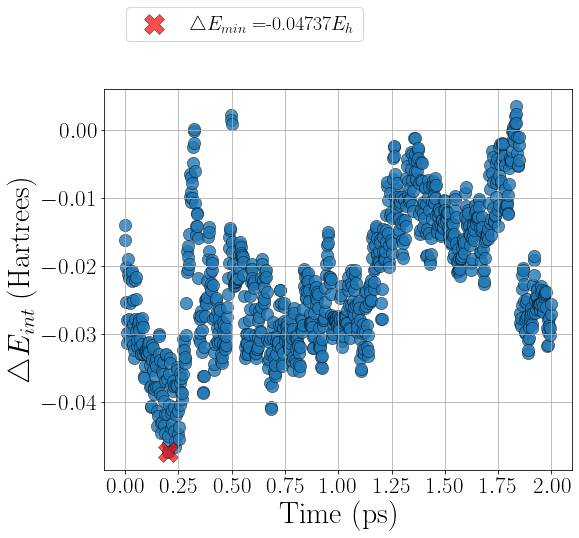

aot-dms1-bg.pdf


In [20]:
import numpy as np
import sys
sys.path.append('../code/')
from herramientas import *
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) 
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"


herr = herramientas()

path_grl0 = "/home/antonio/SIMS/dms-1"

plabel = "dms1"

path_salida = os.path.join(path_grl0, "salida.out")
path = path_salida
txt_2find = "Total DFT energy"

N = 34
au2aFactor = 0.5291771057875306

dic2 = defaultdict(dict)

dfxyz_ = pd.DataFrame({})
idy = 0 # frames
f = open(path, 'r')
# f = open(path, 'r', encoding='utf-8')
# fdata = codecs.open(path, 'r', encoding='utf-8', errors='ignore') 

for line in f:
    
    if txt_2find in line:
        energy = line.split()[4]
        dic2["energy"][idy] = float(energy)
    
    if "DFT ENERGY GRADIENTS" in line:
        line = next(f)
        line = next(f)
        line = next(f)
        
        dic = defaultdict(dict)
        
        idx=0
        for i in range(N):
            line = next(f)
            sp = line.split()
            
            ida = sp[0]
            atom = sp[1]
            x = sp[2]
            y = sp[3]
            z = sp[4]
            fx = sp[5]
            fy = sp[6]
            fz = sp[7]
            
            dic["ida"][idx] = ida
            dic["atom"][idx] = atom
            dic["x"][idx] = float(x)*au2aFactor
            dic["y"][idx] = float(y)*au2aFactor
            dic["z"][idx] = float(z)*au2aFactor
            dic["fx"][idx] = float(fx)
            dic["fy"][idx] = float(fy)
            dic["fz"][idx] = float(fz)        
            dic["frame"][idx] = idy  
            
            idx+=1
            
        dfxyz = pd.DataFrame(dic)
        dfxyz_ = pd.concat([dfxyz_, dfxyz], ignore_index=True)        
 
        cm_vMol = herr.get_CM_from_frame(df=dfxyz.loc[24:]).values 
        vS = dfxyz[["x", "y", "z"]].loc[0].values 
        d = np.linalg.norm(cm_vMol - vS)        
        
        dic2["distance"][idy] = float(d)
        
        
        idy+=1
        
        
        
f.close() 

fig = plt.figure()
ax = plt.gca()

df = pd.DataFrame(dic2)

df2 = df.copy()

refP = df2["energy"].iloc[-1]
print(f"refP e[-1]{refP}")

refP = (-1321.244893630513) + (-553.249445564055) # forma E alone no def
print(f"refP A + B: {refP}")


# df2 = df2.loc[5:]
# df2 = df2[(df2["energy"] - refP)  < -0.02 ]

d = df2["distance"].values
e = df2["energy"].values - refP

df_mpkl = dfxyz_.copy()  # <=======


tmp_df = df_mpkl[df_mpkl["frame"] == df.loc[df[['energy']].idxmin()].index[0]].copy()
tmp_df.loc[:,'ida'] = tmp_df['ida'].astype(int)
tmp_df = tmp_df.set_index('ida')

for idx in tmp_df.index:
    
    symbol = tmp_df["atom"].loc[idx]
    x, y, z = tmp_df[["x", "y", "z"]].loc[idx].values
    print(f"{symbol:<10}{x:.7f}{y:15.7f}{z:15.7f}")
    

df.loc[df[['energy']].idxmin()]





markers = ["v", "P", "X", "^"]


df = df.set_index(2*df.index.values/1e3)
df2 = df2.set_index(2*df2.index.values/1e3)

frames = df.index.values

# from
# c = max + (min-max)/2
# so
# c = min +max/2

# c = (df2["energy"].min() + df2["energy"].max())/2.0
# df3 = df2[df2["energy"] < c].copy()

df3 = df2.copy()

frames = df3.index.values
e = df3["energy"].values - refP

# plt.scatter(frames, e, s=150, edgecolors='black', label=f"AOT-MeOH", alpha=0.8, linewidth=0.5)
plt.scatter(frames, e, s=150, edgecolors='black', alpha=0.8, linewidth=0.5)


#################################################


xmin = df.loc[df[['energy']].idxmin()].iloc[0].name
ymin = df.loc[df[['energy']].idxmin()]["energy"].iloc[0]
print(f"ymin {ymin}")
ymin =  ymin - refP
print(f"ymin - refP: {ymin}")

xmin_label = np.round(xmin, decimals=4)
ymin_label = np.round(ymin, decimals=5)

txt1 = r"$t_{min}=$"
txt2 = r"$\triangle E_{min}=$"
# plt.scatter(xmin, ymin, label=f"{txt1}" + f"{xmin_label:.2f} fs, " + f"{txt2}" + f"{ymin_label:.4f}" + "$ E_{h}$",
#             alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)

plt.scatter(xmin, ymin, label=f"{txt2}" + f"{ymin_label:.5f}" + "$ E_{h}$",
            alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)




# plt.scatter(frames, e, s=50, label="B3LYP/6-31G**")


plt.xlabel("Time (ps)", fontsize=30)
plt.ylabel(r"$\triangle E_{int}$  (Hartrees)", fontsize=30)
plt.grid()

fw = 6
fh = 5
ff = fw/fh

fh = 7
fw = fh*ff

fig.set_size_inches(fw, fh)

plt.legend(fontsize=20)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)


ax.legend(loc='lower center', fontsize=20,  bbox_to_anchor=(0.3,1.1))

plt.show()

name_plot = f"aot-{plabel}-bg-time.pdf"
name_plot = f"aot-{plabel}-bg.pdf"
fig.savefig(name_plot, format="pdf", bbox_inches='tight')
print(name_plot)



# viendo como va aot-dms-2

refP e[-1]-1874.546875041166
refP A + B: -1874.494339194568
S         -0.5106808      0.8283876     -0.2356076
Na        6.1786888    -11.4196806     -0.4757101
O         -2.5178300     -3.2835455     -0.9427047
O         -0.7668168     -2.1897327      1.7099162
O         -4.3779378     -2.5545824      0.1144901
O         0.9187753     -2.0494421      0.2112237
O         -1.6003623      1.6371216     -0.9164088
O         -0.5351632      1.1878984      1.2366366
O         0.8035872      0.8841221     -0.8797284
C         -3.1193567     -2.4133201     -0.3515726
C         -2.5936245     -1.0204905     -0.0608300
C         -1.0957337     -0.9255964     -0.3286274
C         -0.3162177     -1.7882635      0.6582503
C         1.7441466     -2.8258936      1.0951140
C         -4.9792946     -3.8388216     -0.1231263
H         -2.8105691     -0.7749645      0.9824099
H         -3.1283998     -0.3073154     -0.6965098
H         -0.8543088     -1.2377934     -1.3469944
H         2.7008718     -2

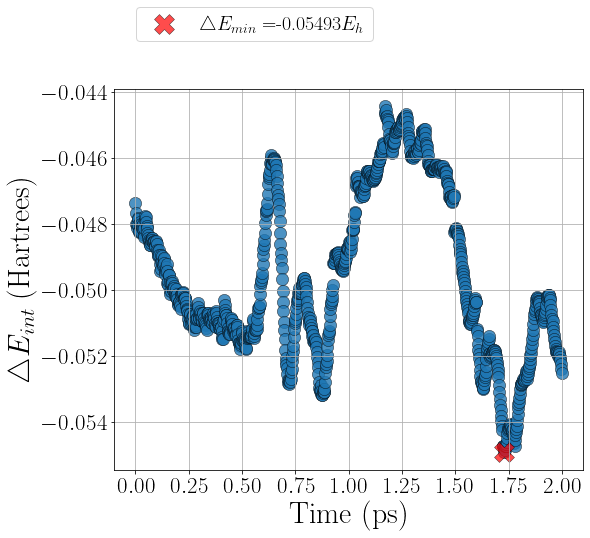

aot-dms2-bg.pdf


In [8]:
import numpy as np
import sys
sys.path.append('../code/')
from herramientas import *
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) 
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"


herr = herramientas()

path_grl0 = "/home/antonio/SIMS/aot-dms-2"

plabel = "dms2"

path_salida = os.path.join(path_grl0, "salida.out")
path = path_salida
txt_2find = "Total DFT energy"

N = 34
au2aFactor = 0.5291771057875306

dic2 = defaultdict(dict)

dfxyz_ = pd.DataFrame({})
idy = 0 # frames
f = open(path, 'r')
# f = open(path, 'r', encoding='utf-8')
# fdata = codecs.open(path, 'r', encoding='utf-8', errors='ignore') 

for line in f:
    
    if txt_2find in line:
        energy = line.split()[4]
        dic2["energy"][idy] = float(energy)
    
    if "DFT ENERGY GRADIENTS" in line:
        line = next(f)
        line = next(f)
        line = next(f)
        
        dic = defaultdict(dict)
        
        idx=0
        for i in range(N):
            line = next(f)
            sp = line.split()
            
            ida = sp[0]
            atom = sp[1]
            x = sp[2]
            y = sp[3]
            z = sp[4]
            fx = sp[5]
            fy = sp[6]
            fz = sp[7]
            
            dic["ida"][idx] = ida
            dic["atom"][idx] = atom
            dic["x"][idx] = float(x)*au2aFactor
            dic["y"][idx] = float(y)*au2aFactor
            dic["z"][idx] = float(z)*au2aFactor
            dic["fx"][idx] = float(fx)
            dic["fy"][idx] = float(fy)
            dic["fz"][idx] = float(fz)        
            dic["frame"][idx] = idy  
            
            idx+=1
            
        dfxyz = pd.DataFrame(dic)
        dfxyz_ = pd.concat([dfxyz_, dfxyz], ignore_index=True)        
 
        cm_vMol = herr.get_CM_from_frame(df=dfxyz.loc[24:]).values 
        vS = dfxyz[["x", "y", "z"]].loc[0].values 
        d = np.linalg.norm(cm_vMol - vS)        
        
        dic2["distance"][idy] = float(d)
        
        
        idy+=1
        
        
        
f.close() 

fig = plt.figure()
ax = plt.gca()

df = pd.DataFrame(dic2)

df2 = df.copy()

refP = df2["energy"].iloc[-1]
print(f"refP e[-1]{refP}")

refP = (-1321.244893630513) + (-553.249445564055) # forma E alone no def
print(f"refP A + B: {refP}")


# df2 = df2.loc[5:]
# df2 = df2[(df2["energy"] - refP)  < -0.02 ]

d = df2["distance"].values
e = df2["energy"].values - refP

df_mpkl = dfxyz_.copy()  # <=======


tmp_df = df_mpkl[df_mpkl["frame"] == df.loc[df[['energy']].idxmin()].index[0]].copy()
tmp_df.loc[:,'ida'] = tmp_df['ida'].astype(int)
tmp_df = tmp_df.set_index('ida')

for idx in tmp_df.index:
    
    symbol = tmp_df["atom"].loc[idx]
    x, y, z = tmp_df[["x", "y", "z"]].loc[idx].values
    print(f"{symbol:<10}{x:.7f}{y:15.7f}{z:15.7f}")
    

df.loc[df[['energy']].idxmin()]





markers = ["v", "P", "X", "^"]


df = df.set_index(2*df.index.values/1e3)
df2 = df2.set_index(2*df2.index.values/1e3)

frames = df.index.values

# from
# c = max + (min-max)/2
# so
# c = min +max/2

# c = (df2["energy"].min() + df2["energy"].max())/2.0
# df3 = df2[df2["energy"] < c].copy()

df3 = df2.copy()

frames = df3.index.values
e = df3["energy"].values - refP

# plt.scatter(frames, e, s=150, edgecolors='black', label=f"AOT-MeOH", alpha=0.8, linewidth=0.5)
plt.scatter(frames, e, s=150, edgecolors='black', alpha=0.8, linewidth=0.5)


#################################################


xmin = df.loc[df[['energy']].idxmin()].iloc[0].name
ymin = df.loc[df[['energy']].idxmin()]["energy"].iloc[0]
print(f"ymin {ymin}")
ymin =  ymin - refP
print(f"ymin - refP: {ymin}")

xmin_label = np.round(xmin, decimals=4)
ymin_label = np.round(ymin, decimals=5)

txt1 = r"$t_{min}=$"
txt2 = r"$\triangle E_{min}=$"
# plt.scatter(xmin, ymin, label=f"{txt1}" + f"{xmin_label:.2f} fs, " + f"{txt2}" + f"{ymin_label:.4f}" + "$ E_{h}$",
#             alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)

plt.scatter(xmin, ymin, label=f"{txt2}" + f"{ymin_label:.5f}" + "$ E_{h}$",
            alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)




# plt.scatter(frames, e, s=50, label="B3LYP/6-31G**")


plt.xlabel("Time (ps)", fontsize=30)
plt.ylabel(r"$\triangle E_{int}$  (Hartrees)", fontsize=30)
plt.grid()

fw = 6
fh = 5
ff = fw/fh

fh = 7
fw = fh*ff

fig.set_size_inches(fw, fh)

plt.legend(fontsize=20)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)


ax.legend(loc='lower center', fontsize=20,  bbox_to_anchor=(0.3,1.1))

plt.show()

name_plot = f"aot-{plabel}-bg-time.pdf"
name_plot = f"aot-{plabel}-bg.pdf"
fig.savefig(name_plot, format="pdf", bbox_inches='tight')
print(name_plot)



In [32]:
len(df)

1000

# viendo aot-gl-1

refP e[-1]-1666.160751388735
refP A + B: -1666.144852984391
S         -0.7190421     -0.6720195     -0.2975425
Na        7.5670956    -11.9029637     -0.4600253
O         -2.1607592     -5.0310132     -0.8952581
O         -0.5295867     -3.6584961      1.7036550
O         -4.0843487     -4.5403644      0.1855385
O         1.0955157     -3.3203329      0.1701389
O         -1.9199371     -0.0318390     -0.9705722
O         -0.7670248     -0.2905050      1.1685739
O         0.5642928     -0.4512717     -0.9680792
C         -2.8647574     -4.2389684     -0.3073656
C         -2.5282278     -2.7823418     -0.0506782
C         -1.0619002     -2.4905826     -0.3492728
C         -0.1557040     -3.2202517      0.6367091
C         2.0336673     -3.9603922      1.0508055
C         -4.5096362     -5.8986351     -0.0184085
H         -2.7586913     -2.5481846      0.9922759
H         -3.1656909     -2.1607450     -0.6878212
H         -0.7977059     -2.7869811     -1.3667078
H         2.9864009     -3

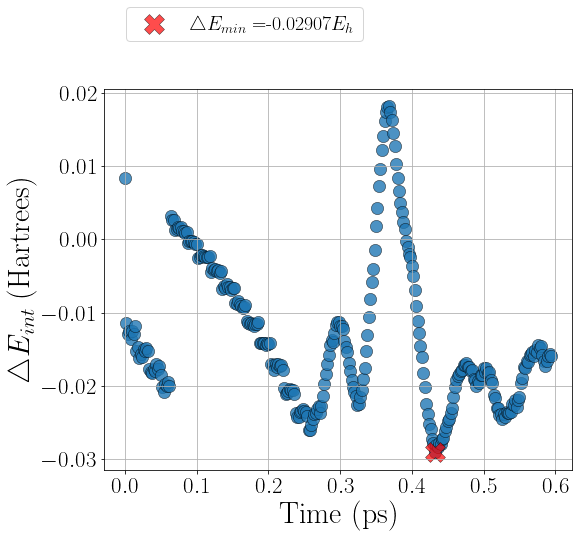

aot-gl1-bg.pdf


In [33]:
import numpy as np
import sys
sys.path.append('../code/')
from herramientas import *
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) 
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"


herr = herramientas()

path_grl0 = "/home/antonio/SIMS/aot-gl-1"

plabel = "gl1"

path_salida = os.path.join(path_grl0, "salida.out")
path = path_salida
txt_2find = "Total DFT energy"

N = 38
au2aFactor = 0.5291771057875306

dic2 = defaultdict(dict)

dfxyz_ = pd.DataFrame({})
idy = 0 # frames
f = open(path, 'r')
# f = open(path, 'r', encoding='utf-8')
# fdata = codecs.open(path, 'r', encoding='utf-8', errors='ignore') 

for line in f:
    
    if txt_2find in line:
        energy = line.split()[4]
        dic2["energy"][idy] = float(energy)
    
    if "DFT ENERGY GRADIENTS" in line:
        line = next(f)
        line = next(f)
        line = next(f)
        
        dic = defaultdict(dict)
        
        idx=0
        for i in range(N):
            line = next(f)
            sp = line.split()
            
            ida = sp[0]
            atom = sp[1]
            x = sp[2]
            y = sp[3]
            z = sp[4]
            fx = sp[5]
            fy = sp[6]
            fz = sp[7]
            
            dic["ida"][idx] = ida
            dic["atom"][idx] = atom
            dic["x"][idx] = float(x)*au2aFactor
            dic["y"][idx] = float(y)*au2aFactor
            dic["z"][idx] = float(z)*au2aFactor
            dic["fx"][idx] = float(fx)
            dic["fy"][idx] = float(fy)
            dic["fz"][idx] = float(fz)        
            dic["frame"][idx] = idy  
            
            idx+=1
            
        dfxyz = pd.DataFrame(dic)
        dfxyz_ = pd.concat([dfxyz_, dfxyz], ignore_index=True)        
 
        cm_vMol = herr.get_CM_from_frame(df=dfxyz.loc[24:]).values 
        vS = dfxyz[["x", "y", "z"]].loc[0].values 
        d = np.linalg.norm(cm_vMol - vS)        
        
        dic2["distance"][idy] = float(d)
        
        
        idy+=1
        
        
        
f.close() 

fig = plt.figure()
ax = plt.gca()

df = pd.DataFrame(dic2)

df2 = df.copy()

refP = df2["energy"].iloc[-1]
print(f"refP e[-1]{refP}")

refP = (-1321.244893630513) + (-344.899959353878) # forma E alone no def
print(f"refP A + B: {refP}")


# df2 = df2.loc[5:]
# df2 = df2[(df2["energy"] - refP)  < -0.02 ]

d = df2["distance"].values
e = df2["energy"].values - refP

df_mpkl = dfxyz_.copy()  # <=======


tmp_df = df_mpkl[df_mpkl["frame"] == df.loc[df[['energy']].idxmin()].index[0]].copy()
tmp_df.loc[:,'ida'] = tmp_df['ida'].astype(int)
tmp_df = tmp_df.set_index('ida')

for idx in tmp_df.index:
    
    symbol = tmp_df["atom"].loc[idx]
    x, y, z = tmp_df[["x", "y", "z"]].loc[idx].values
    print(f"{symbol:<10}{x:.7f}{y:15.7f}{z:15.7f}")
    

df.loc[df[['energy']].idxmin()]





markers = ["v", "P", "X", "^"]


df = df.set_index(2*df.index.values/1e3)
df2 = df2.set_index(2*df2.index.values/1e3)

frames = df.index.values

# from
# c = max + (min-max)/2
# so
# c = min +max/2

# c = (df2["energy"].min() + df2["energy"].max())/2.0
# df3 = df2[df2["energy"] < c].copy()

df3 = df2.copy()

frames = df3.index.values
e = df3["energy"].values - refP

# plt.scatter(frames, e, s=150, edgecolors='black', label=f"AOT-MeOH", alpha=0.8, linewidth=0.5)
plt.scatter(frames, e, s=150, edgecolors='black', alpha=0.8, linewidth=0.5)


#################################################


xmin = df.loc[df[['energy']].idxmin()].iloc[0].name
ymin = df.loc[df[['energy']].idxmin()]["energy"].iloc[0]
print(f"ymin {ymin}")
ymin =  ymin - refP
print(f"ymin - refP: {ymin}")

xmin_label = np.round(xmin, decimals=4)
ymin_label = np.round(ymin, decimals=5)

txt1 = r"$t_{min}=$"
txt2 = r"$\triangle E_{min}=$"
# plt.scatter(xmin, ymin, label=f"{txt1}" + f"{xmin_label:.2f} fs, " + f"{txt2}" + f"{ymin_label:.4f}" + "$ E_{h}$",
#             alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)

plt.scatter(xmin, ymin, label=f"{txt2}" + f"{ymin_label:.5f}" + "$ E_{h}$",
            alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)




# plt.scatter(frames, e, s=50, label="B3LYP/6-31G**")


plt.xlabel("Time (ps)", fontsize=30)
plt.ylabel(r"$\triangle E_{int}$  (Hartrees)", fontsize=30)
plt.grid()

fw = 6
fh = 5
ff = fw/fh

fh = 7
fw = fh*ff

fig.set_size_inches(fw, fh)

plt.legend(fontsize=20)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)


ax.legend(loc='lower center', fontsize=20,  bbox_to_anchor=(0.3,1.1))

plt.show()

name_plot = f"aot-{plabel}-bg-time.pdf"
name_plot = f"aot-{plabel}-bg.pdf"
fig.savefig(name_plot, format="pdf", bbox_inches='tight')
print(name_plot)





# ================================================

# modificaciones de amir, 

# aot-gl-1"


refP e[-1]-1666.160751388735
refP A + B: -1666.144852984391
S         -0.7190421     -0.6720195     -0.2975425
Na        7.5670956    -11.9029637     -0.4600253
O         -2.1607592     -5.0310132     -0.8952581
O         -0.5295867     -3.6584961      1.7036550
O         -4.0843487     -4.5403644      0.1855385
O         1.0955157     -3.3203329      0.1701389
O         -1.9199371     -0.0318390     -0.9705722
O         -0.7670248     -0.2905050      1.1685739
O         0.5642928     -0.4512717     -0.9680792
C         -2.8647574     -4.2389684     -0.3073656
C         -2.5282278     -2.7823418     -0.0506782
C         -1.0619002     -2.4905826     -0.3492728
C         -0.1557040     -3.2202517      0.6367091
C         2.0336673     -3.9603922      1.0508055
C         -4.5096362     -5.8986351     -0.0184085
H         -2.7586913     -2.5481846      0.9922759
H         -3.1656909     -2.1607450     -0.6878212
H         -0.7977059     -2.7869811     -1.3667078
H         2.9864009     -3

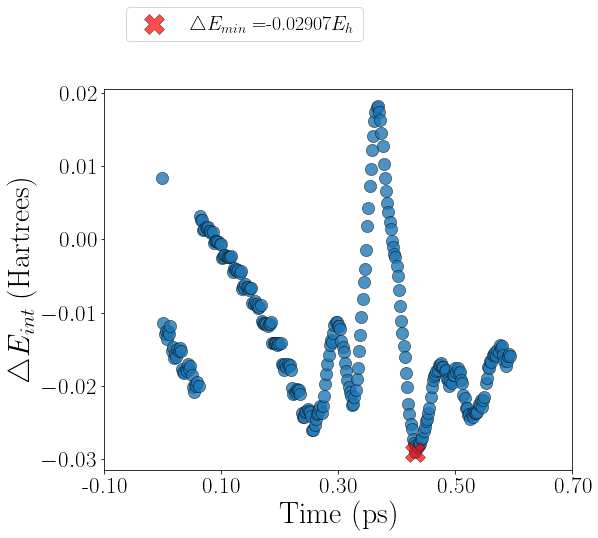

aot-gl1-bg.pdf


In [19]:
import numpy as np
import sys
sys.path.append('../code/')
from herramientas import *
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) 
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"


herr = herramientas()

path_grl0 = "/home/antonio/SIMS/aot-gl-1"

plabel = "gl1"

path_salida = os.path.join(path_grl0, "salida.out")
path = path_salida
txt_2find = "Total DFT energy"

N = 38
au2aFactor = 0.5291771057875306

dic2 = defaultdict(dict)

dfxyz_ = pd.DataFrame({})
idy = 0 # frames
f = open(path, 'r')
# f = open(path, 'r', encoding='utf-8')
# fdata = codecs.open(path, 'r', encoding='utf-8', errors='ignore') 

for line in f:
    
    if txt_2find in line:
        energy = line.split()[4]
        dic2["energy"][idy] = float(energy)
    
    if "DFT ENERGY GRADIENTS" in line:
        line = next(f)
        line = next(f)
        line = next(f)
        
        dic = defaultdict(dict)
        
        idx=0
        for i in range(N):
            line = next(f)
            sp = line.split()
            
            ida = sp[0]
            atom = sp[1]
            x = sp[2]
            y = sp[3]
            z = sp[4]
            fx = sp[5]
            fy = sp[6]
            fz = sp[7]
            
            dic["ida"][idx] = ida
            dic["atom"][idx] = atom
            dic["x"][idx] = float(x)*au2aFactor
            dic["y"][idx] = float(y)*au2aFactor
            dic["z"][idx] = float(z)*au2aFactor
            dic["fx"][idx] = float(fx)
            dic["fy"][idx] = float(fy)
            dic["fz"][idx] = float(fz)        
            dic["frame"][idx] = idy  
            
            idx+=1
            
        dfxyz = pd.DataFrame(dic)
        dfxyz_ = pd.concat([dfxyz_, dfxyz], ignore_index=True)        
 
        cm_vMol = herr.get_CM_from_frame(df=dfxyz.loc[24:]).values 
        vS = dfxyz[["x", "y", "z"]].loc[0].values 
        d = np.linalg.norm(cm_vMol - vS)        
        
        dic2["distance"][idy] = float(d)
        
        
        idy+=1
        
        
        
f.close() 

fig = plt.figure()
ax = plt.gca()

df = pd.DataFrame(dic2)

df2 = df.copy()

refP = df2["energy"].iloc[-1]
print(f"refP e[-1]{refP}")

refP = (-1321.244893630513) + (-344.899959353878) # forma E alone no def
print(f"refP A + B: {refP}")


d = df2["distance"].values
e = df2["energy"].values - refP

df_mpkl = dfxyz_.copy()  # <=======


tmp_df = df_mpkl[df_mpkl["frame"] == df.loc[df[['energy']].idxmin()].index[0]].copy()
tmp_df.loc[:,'ida'] = tmp_df['ida'].astype(int)
tmp_df = tmp_df.set_index('ida')

for idx in tmp_df.index:
    
    symbol = tmp_df["atom"].loc[idx]
    x, y, z = tmp_df[["x", "y", "z"]].loc[idx].values
    print(f"{symbol:<10}{x:.7f}{y:15.7f}{z:15.7f}")
    

df.loc[df[['energy']].idxmin()]





markers = ["v", "P", "X", "^"]


df = df.set_index(2*df.index.values/1e3)
df2 = df2.set_index(2*df2.index.values/1e3)

frames = df.index.values



df3 = df2.copy()

frames = df3.index.values
e = df3["energy"].values - refP

plt.scatter(frames, e, s=150, edgecolors='black', alpha=0.8, linewidth=0.5)


#################################################


xmin = df.loc[df[['energy']].idxmin()].iloc[0].name
ymin = df.loc[df[['energy']].idxmin()]["energy"].iloc[0]
print(f"ymin {ymin}")
ymin =  ymin - refP
print(f"ymin - refP: {ymin}")

xmin_label = np.round(xmin, decimals=4)
ymin_label = np.round(ymin, decimals=5)

txt1 = r"$t_{min}=$"
txt2 = r"$\triangle E_{min}=$"

plt.scatter(xmin, ymin, label=f"{txt2}" + f"{ymin_label:.5f}" + "$ E_{h}$",
            alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)


plt.xlabel("Time (ps)", fontsize=30)
plt.ylabel(r"$\triangle E_{int}$  (Hartrees)", fontsize=30)

fw = 6
fh = 5
ff = fw/fh

fh = 7
fw = fh*ff

fig.set_size_inches(fw, fh)

plt.legend(fontsize=20)

###############################333

xts = ax.get_xticks()[::2]
sxts = [f'{np.round(xt, decimals=2):.2f}' for xt in xts]
plt.xticks(xts, sxts, fontsize=23)

yts = ax.get_yticks()[::2]
syts = [f'{np.round(yt, decimals=2):.2f}' for yt in xts]
plt.yticks(fontsize=23)

####################################

ax.legend(loc='lower center', fontsize=20,  bbox_to_anchor=(0.3,1.1))

plt.show()

name_plot = f"aot-{plabel}-bg-time.pdf"
name_plot = f"aot-{plabel}-bg.pdf"
fig.savefig(name_plot, format="pdf", bbox_inches='tight')
print(name_plot)





In [12]:
ax.get_xticks()

array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7])

In [18]:
xts = ax.get_xticks()[::2]
sxts = [f'{np.round(xt, decimals=2):.2f}' for xt in xts]
sxts



['-0.10', '0.10', '0.30', '0.50', '0.70']

In [17]:
sxts[::2]

['-0.10', '0.10', '0.30', '0.50', '0.70']

# aot-dms-2

refP e[-1]-1874.546875041166
refP A + B: -1874.494339194568
S         -0.5106808      0.8283876     -0.2356076
Na        6.1786888    -11.4196806     -0.4757101
O         -2.5178300     -3.2835455     -0.9427047
O         -0.7668168     -2.1897327      1.7099162
O         -4.3779378     -2.5545824      0.1144901
O         0.9187753     -2.0494421      0.2112237
O         -1.6003623      1.6371216     -0.9164088
O         -0.5351632      1.1878984      1.2366366
O         0.8035872      0.8841221     -0.8797284
C         -3.1193567     -2.4133201     -0.3515726
C         -2.5936245     -1.0204905     -0.0608300
C         -1.0957337     -0.9255964     -0.3286274
C         -0.3162177     -1.7882635      0.6582503
C         1.7441466     -2.8258936      1.0951140
C         -4.9792946     -3.8388216     -0.1231263
H         -2.8105691     -0.7749645      0.9824099
H         -3.1283998     -0.3073154     -0.6965098
H         -0.8543088     -1.2377934     -1.3469944
H         2.7008718     -2

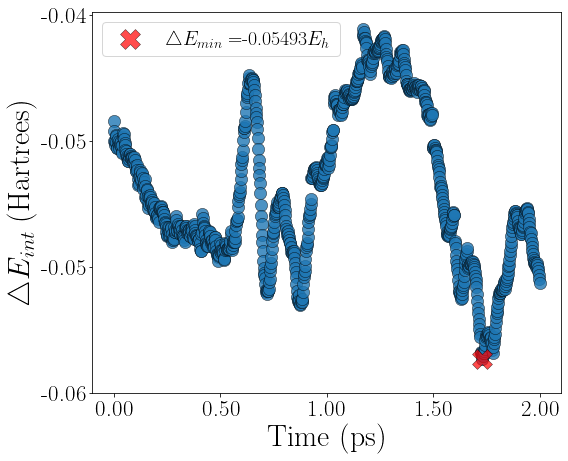

aot-dms2-bg.pdf


In [11]:
import numpy as np
import sys
sys.path.append('../code/')
from herramientas import *
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) 
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"


herr = herramientas()

path_grl0 = "/home/antonio/SIMS/aot-dms-2"

plabel = "dms2"

path_salida = os.path.join(path_grl0, "salida.out")
path = path_salida
txt_2find = "Total DFT energy"

N = 34
au2aFactor = 0.5291771057875306

dic2 = defaultdict(dict)

dfxyz_ = pd.DataFrame({})
idy = 0 # frames
f = open(path, 'r')
# f = open(path, 'r', encoding='utf-8')
# fdata = codecs.open(path, 'r', encoding='utf-8', errors='ignore') 

for line in f:
    
    if txt_2find in line:
        energy = line.split()[4]
        dic2["energy"][idy] = float(energy)
    
    if "DFT ENERGY GRADIENTS" in line:
        line = next(f)
        line = next(f)
        line = next(f)
        
        dic = defaultdict(dict)
        
        idx=0
        for i in range(N):
            line = next(f)
            sp = line.split()
            
            ida = sp[0]
            atom = sp[1]
            x = sp[2]
            y = sp[3]
            z = sp[4]
            fx = sp[5]
            fy = sp[6]
            fz = sp[7]
            
            dic["ida"][idx] = ida
            dic["atom"][idx] = atom
            dic["x"][idx] = float(x)*au2aFactor
            dic["y"][idx] = float(y)*au2aFactor
            dic["z"][idx] = float(z)*au2aFactor
            dic["fx"][idx] = float(fx)
            dic["fy"][idx] = float(fy)
            dic["fz"][idx] = float(fz)        
            dic["frame"][idx] = idy  
            
            idx+=1
            
        dfxyz = pd.DataFrame(dic)
        dfxyz_ = pd.concat([dfxyz_, dfxyz], ignore_index=True)        
 
        cm_vMol = herr.get_CM_from_frame(df=dfxyz.loc[24:]).values 
        vS = dfxyz[["x", "y", "z"]].loc[0].values 
        d = np.linalg.norm(cm_vMol - vS)        
        
        dic2["distance"][idy] = float(d)
        
        
        idy+=1
        
        
        
f.close() 

fig = plt.figure()
ax = plt.gca()

df = pd.DataFrame(dic2)

df2 = df.copy()

refP = df2["energy"].iloc[-1]
print(f"refP e[-1]{refP}")

refP = (-1321.244893630513) + (-553.249445564055) # forma E alone no def
print(f"refP A + B: {refP}")


# df2 = df2.loc[5:]
# df2 = df2[(df2["energy"] - refP)  < -0.02 ]

d = df2["distance"].values
e = df2["energy"].values - refP

df_mpkl = dfxyz_.copy()  # <=======


tmp_df = df_mpkl[df_mpkl["frame"] == df.loc[df[['energy']].idxmin()].index[0]].copy()
tmp_df.loc[:,'ida'] = tmp_df['ida'].astype(int)
tmp_df = tmp_df.set_index('ida')

for idx in tmp_df.index:
    
    symbol = tmp_df["atom"].loc[idx]
    x, y, z = tmp_df[["x", "y", "z"]].loc[idx].values
    print(f"{symbol:<10}{x:.7f}{y:15.7f}{z:15.7f}")
    

df.loc[df[['energy']].idxmin()]





markers = ["v", "P", "X", "^"]


df = df.set_index(2*df.index.values/1e3)
df2 = df2.set_index(2*df2.index.values/1e3)

frames = df.index.values

# from
# c = max + (min-max)/2
# so
# c = min +max/2

# c = (df2["energy"].min() + df2["energy"].max())/2.0
# df3 = df2[df2["energy"] < c].copy()

df3 = df2.copy()

frames = df3.index.values
e = df3["energy"].values - refP

# plt.scatter(frames, e, s=150, edgecolors='black', label=f"AOT-MeOH", alpha=0.8, linewidth=0.5)
plt.scatter(frames, e, s=150, edgecolors='black', alpha=0.8, linewidth=0.5)


#################################################


xmin = df.loc[df[['energy']].idxmin()].iloc[0].name
ymin = df.loc[df[['energy']].idxmin()]["energy"].iloc[0]
print(f"ymin {ymin}")
ymin =  ymin - refP
print(f"ymin - refP: {ymin}")

xmin_label = np.round(xmin, decimals=4)
ymin_label = np.round(ymin, decimals=5)

txt1 = r"$t_{min}=$"
txt2 = r"$\triangle E_{min}=$"


plt.scatter(xmin, ymin, label=f"{txt2}" + f"{ymin_label:.5f}" + "$ E_{h}$",
            alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)






plt.xlabel("Time (ps)", fontsize=30)
plt.ylabel(r"$\triangle E_{int}$  (Hartrees)", fontsize=30)

fw = 6
fh = 5
ff = fw/fh

fh = 7
fw = fh*ff

fig.set_size_inches(fw, fh)

plt.legend(fontsize=20)


###############################333

xts = [0.0, 0.5, 1.0, 1.5, 2.0]
sxts = [f'{np.round(xt, decimals=2):.2f}' for xt in xts]
plt.xticks(xts, sxts, fontsize=23)

yts = ax.get_yticks()[::2]
syts = [f'{np.round(yt, decimals=2):.2f}' for yt in yts]
plt.yticks(yts, syts, fontsize=23)

####################################


ax.legend(fontsize=20)

plt.show()

name_plot = f"aot-{plabel}-bg-time.pdf"
name_plot = f"aot-{plabel}-bg.pdf"
fig.savefig(name_plot, format="pdf", bbox_inches='tight')
print(name_plot)



# gl2

refP e[-1]-1666.188011498739
refP A + B: -1666.144852984391
S         -0.2554449      1.0397187     -0.2060870
Na        4.8427511    -11.9495615     -0.5348980
O         -2.7821423     -2.7934926     -0.8055160
O         -0.8210479     -1.9105183      1.7778594
O         -4.5005296     -1.8312740      0.3035138
O         0.8180491     -1.9912998      0.2241256
O         -1.2578423      1.9740280     -0.8598033
O         -0.1859004      1.4086620      1.2623605
O         1.0332887      0.9267177     -0.8928673
C         -3.2504640     -1.8512832     -0.2043322
C         -2.5456922     -0.5332237      0.0548661
C         -1.0574536     -0.6279787     -0.2620776
C         -0.3591678     -1.5751353      0.7080496
C         1.5691694     -2.8593138      1.0889660
C         -5.2648915     -3.0316900      0.0987847
H         -2.6955239     -0.2560397      1.1020055
H         -3.0082702      0.2372095     -0.5705482
H         -0.8908755     -0.9742632     -1.2843769
H         2.4881923     -3

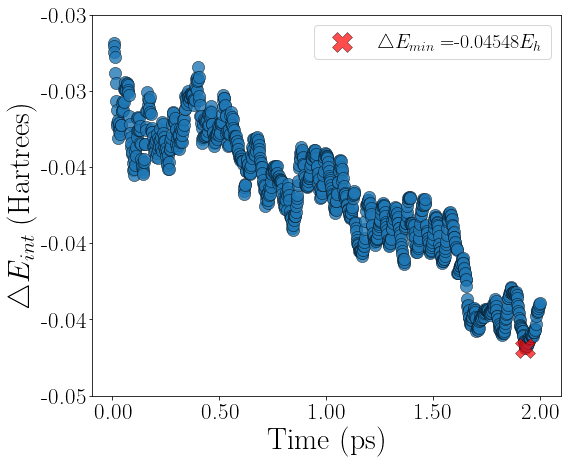

aot-gl2-bg.pdf


In [10]:
import numpy as np
import sys
sys.path.append('../code/')
from herramientas import *
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) 
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"


herr = herramientas()

path_grl0 = "/home/antonio/SIMS/aot-gl-2"

plabel = "gl2"

path_salida = os.path.join(path_grl0, "salida.out")
path = path_salida
txt_2find = "Total DFT energy"

N = 38
au2aFactor = 0.5291771057875306

dic2 = defaultdict(dict)

dfxyz_ = pd.DataFrame({})
idy = 0 # frames
f = open(path, 'r')
# f = open(path, 'r', encoding='utf-8')
# fdata = codecs.open(path, 'r', encoding='utf-8', errors='ignore') 

for line in f:
    
    if txt_2find in line:
        energy = line.split()[4]
        dic2["energy"][idy] = float(energy)
    
    if "DFT ENERGY GRADIENTS" in line:
        line = next(f)
        line = next(f)
        line = next(f)
        
        dic = defaultdict(dict)
        
        idx=0
        for i in range(N):
            line = next(f)
            sp = line.split()
            
            ida = sp[0]
            atom = sp[1]
            x = sp[2]
            y = sp[3]
            z = sp[4]
            fx = sp[5]
            fy = sp[6]
            fz = sp[7]
            
            dic["ida"][idx] = ida
            dic["atom"][idx] = atom
            dic["x"][idx] = float(x)*au2aFactor
            dic["y"][idx] = float(y)*au2aFactor
            dic["z"][idx] = float(z)*au2aFactor
            dic["fx"][idx] = float(fx)
            dic["fy"][idx] = float(fy)
            dic["fz"][idx] = float(fz)        
            dic["frame"][idx] = idy  
            
            idx+=1
            
        dfxyz = pd.DataFrame(dic)
        dfxyz_ = pd.concat([dfxyz_, dfxyz], ignore_index=True)        
 
        cm_vMol = herr.get_CM_from_frame(df=dfxyz.loc[24:]).values 
        vS = dfxyz[["x", "y", "z"]].loc[0].values 
        d = np.linalg.norm(cm_vMol - vS)        
        
        dic2["distance"][idy] = float(d)
        
        
        idy+=1
        
        
        
f.close() 

fig = plt.figure()
ax = plt.gca()

df = pd.DataFrame(dic2)

df2 = df.copy()

refP = df2["energy"].iloc[-1]
print(f"refP e[-1]{refP}")

refP = (-1321.244893630513) + ( -344.899959353878) # forma E alone no def
print(f"refP A + B: {refP}")


# df2 = df2.loc[5:]
# df2 = df2[(df2["energy"] - refP)  < -0.02 ]

d = df2["distance"].values
e = df2["energy"].values - refP

df_mpkl = dfxyz_.copy()  # <=======


tmp_df = df_mpkl[df_mpkl["frame"] == df.loc[df[['energy']].idxmin()].index[0]].copy()
tmp_df.loc[:,'ida'] = tmp_df['ida'].astype(int)
tmp_df = tmp_df.set_index('ida')

for idx in tmp_df.index:
    
    symbol = tmp_df["atom"].loc[idx]
    x, y, z = tmp_df[["x", "y", "z"]].loc[idx].values
    print(f"{symbol:<10}{x:.7f}{y:15.7f}{z:15.7f}")
    

df.loc[df[['energy']].idxmin()]





markers = ["v", "P", "X", "^"]


df = df.set_index(2*df.index.values/1e3)
df2 = df2.set_index(2*df2.index.values/1e3)

frames = df.index.values

# from
# c = max + (min-max)/2
# so
# c = min +max/2

c = df2["energy"].max() + (df2["energy"].min() - df2["energy"].max())*0.3
df3 = df2[df2["energy"] < c].copy()

# df3 = df2.copy()

frames = df3.index.values
e = df3["energy"].values - refP

print(f"e0: {e[0]}")

# plt.scatter(frames, e, s=150, edgecolors='black', label=f"AOT-MeOH", alpha=0.8, linewidth=0.5)
plt.scatter(frames, e, s=150, edgecolors='black', alpha=0.8, linewidth=0.5)


#################################################


xmin = df.loc[df[['energy']].idxmin()].iloc[0].name
ymin = df.loc[df[['energy']].idxmin()]["energy"].iloc[0]
print(f"ymin {ymin}")
ymin =  ymin - refP
print(f"ymin - refP: {ymin}")

xmin_label = np.round(xmin, decimals=4)
ymin_label = np.round(ymin, decimals=5)

txt1 = r"$t_{min}=$"
txt2 = r"$\triangle E_{min}=$"
# plt.scatter(xmin, ymin, label=f"{txt1}" + f"{xmin_label:.2f} fs, " + f"{txt2}" + f"{ymin_label:.4f}" + "$ E_{h}$",
#             alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)

plt.scatter(xmin, ymin, label=f"{txt2}" + f"{ymin_label:.5f}" + "$ E_{h}$",
            alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)




# plt.scatter(frames, e, s=50, label="B3LYP/6-31G**")


plt.xlabel("Time (ps)", fontsize=30)
plt.ylabel(r"$\triangle E_{int}$  (Hartrees)", fontsize=30)

fw = 6
fh = 5
ff = fw/fh

fh = 7
fw = fh*ff

fig.set_size_inches(fw, fh)

plt.legend(fontsize=20)


###############################333

xts = [0.0, 0.5, 1.0, 1.5, 2.0]
sxts = [f'{np.round(xt, decimals=2):.2f}' for xt in xts]
plt.xticks(xts, sxts, fontsize=23)

yts = ax.get_yticks()[::2]
syts = [f'{np.round(yt, decimals=2):.2f}' for yt in yts]
plt.yticks(yts, syts, fontsize=23)

####################################


ax.legend(fontsize=20)

plt.show()

name_plot = f"aot-{plabel}-bg-time.pdf"
name_plot = f"aot-{plabel}-bg.pdf"
fig.savefig(name_plot, format="pdf", bbox_inches='tight')
print(name_plot)



# dmf2

refP e[-1]-1568.527308724829
refP A + B: -1569.8339189266098
S         0.1168714      1.1550751     -0.4575514
Na        4.0466142    -12.2357352     -0.2026129
O         -2.7476204     -2.4636248     -0.8267239
O         -0.6688396     -1.6325018      1.6805612
O         -4.3539750     -1.2994367      0.2565699
O         0.9276570     -1.9345667      0.1098683
O         -0.8115307      2.1414400     -1.1433046
O         0.2458636      1.5879891      0.9892559
O         1.3776898      0.8947136     -1.1559720
C         -3.1200436     -1.4552767     -0.2673286
C         -2.2975177     -0.1938143     -0.0850070
C         -0.8294904     -0.4355657     -0.4178330
C         -0.1992315     -1.3922750      0.5888069
C         1.6154729     -2.8222391      1.0066531
C         -5.2245915     -2.4360499      0.1234665
H         -2.4029006      0.1466604      0.9487077
H         -2.7021000      0.5830082     -0.7419963
H         -0.7130963     -0.8449879     -1.4237277
H         2.5011223     -3.

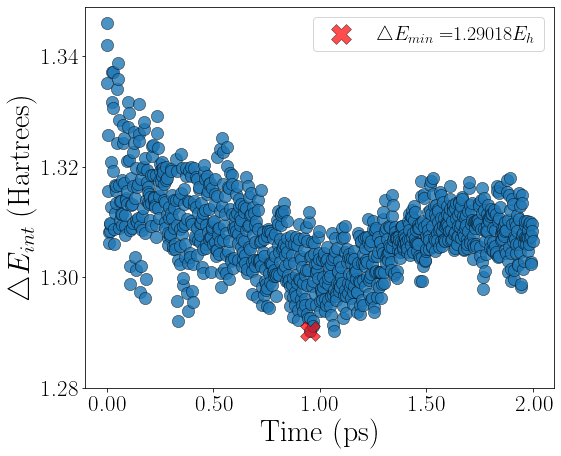

aot-dmf2-bg.pdf


In [9]:
import numpy as np
import sys
sys.path.append('../code/')
from herramientas import *
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) 
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"


herr = herramientas()

path_grl0 = "/home/antonio/SIMS/aot-dmf-2"

plabel = "dmf2"

path_salida = os.path.join(path_grl0, "salida.out")
path = path_salida
txt_2find = "Total DFT energy"

N = 34
au2aFactor = 0.5291771057875306

dic2 = defaultdict(dict)

dfxyz_ = pd.DataFrame({})
idy = 0 # frames
f = open(path, 'r')
# f = open(path, 'r', encoding='utf-8')
# fdata = codecs.open(path, 'r', encoding='utf-8', errors='ignore') 

for line in f:
    
    if txt_2find in line:
        energy = line.split()[4]
        dic2["energy"][idy] = float(energy)
    
    if "DFT ENERGY GRADIENTS" in line:
        line = next(f)
        line = next(f)
        line = next(f)
        
        dic = defaultdict(dict)
        
        idx=0
        for i in range(N):
            line = next(f)
            sp = line.split()
            
            ida = sp[0]
            atom = sp[1]
            x = sp[2]
            y = sp[3]
            z = sp[4]
            fx = sp[5]
            fy = sp[6]
            fz = sp[7]
            
            dic["ida"][idx] = ida
            dic["atom"][idx] = atom
            dic["x"][idx] = float(x)*au2aFactor
            dic["y"][idx] = float(y)*au2aFactor
            dic["z"][idx] = float(z)*au2aFactor
            dic["fx"][idx] = float(fx)
            dic["fy"][idx] = float(fy)
            dic["fz"][idx] = float(fz)        
            dic["frame"][idx] = idy  
            
            idx+=1
            
        dfxyz = pd.DataFrame(dic)
        dfxyz_ = pd.concat([dfxyz_, dfxyz], ignore_index=True)        
 
        cm_vMol = herr.get_CM_from_frame(df=dfxyz.loc[24:]).values 
        vS = dfxyz[["x", "y", "z"]].loc[0].values 
        d = np.linalg.norm(cm_vMol - vS)        
        
        dic2["distance"][idy] = float(d)
        
        
        idy+=1
        
        
        
f.close() 

fig = plt.figure()
ax = plt.gca()

df = pd.DataFrame(dic2)

df2 = df.copy()

refP = df2["energy"].iloc[-1]
print(f"refP e[-1]{refP}")

refP = (-1321.244893630513) + (-248.589025296097) # forma E alone no def
print(f"refP A + B: {refP}")

# df2 = df2.loc[5:]
# df2 = df2[(df2["energy"] - refP)  < -0.02 ]

d = df2["distance"].values
e = df2["energy"].values - refP

df_mpkl = dfxyz_.copy()  # <=======


tmp_df = df_mpkl[df_mpkl["frame"] == df.loc[df[['energy']].idxmin()].index[0]].copy()
tmp_df.loc[:,'ida'] = tmp_df['ida'].astype(int)
tmp_df = tmp_df.set_index('ida')

for idx in tmp_df.index:
    
    symbol = tmp_df["atom"].loc[idx]
    x, y, z = tmp_df[["x", "y", "z"]].loc[idx].values
    print(f"{symbol:<10}{x:.7f}{y:15.7f}{z:15.7f}")
    

df.loc[df[['energy']].idxmin()]





markers = ["v", "P", "X", "^"]


df = df.set_index(2*df.index.values/1e3)
df2 = df2.set_index(2*df2.index.values/1e3)

frames = df.index.values

# from
# c = max + (min-max)/2
# so
# c = min +max/2

# c = (df2["energy"].min() + df2["energy"].max())/2.0
# df3 = df2[df2["energy"] < c].copy()

df3 = df2.copy()

frames = df3.index.values
e = df3["energy"].values - refP

# plt.scatter(frames, e, s=150, edgecolors='black', label=f"AOT-MeOH", alpha=0.8, linewidth=0.5)
plt.scatter(frames, e, s=150, edgecolors='black', alpha=0.8, linewidth=0.5)


#################################################


xmin = df.loc[df[['energy']].idxmin()].iloc[0].name
ymin = df.loc[df[['energy']].idxmin()]["energy"].iloc[0]
print(f"ymin {ymin}")
ymin =  ymin - refP
print(f"ymin - refP: {ymin}")

xmin_label = np.round(xmin, decimals=4)
ymin_label = np.round(ymin, decimals=5)

txt1 = r"$t_{min}=$"
txt2 = r"$\triangle E_{min}=$"
# plt.scatter(xmin, ymin, label=f"{txt1}" + f"{xmin_label:.2f} fs, " + f"{txt2}" + f"{ymin_label:.4f}" + "$ E_{h}$",
#             alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)

plt.scatter(xmin, ymin, label=f"{txt2}" + f"{ymin_label:.5f}" + "$ E_{h}$",
            alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)




# plt.scatter(frames, e, s=50, label="B3LYP/6-31G**")


plt.xlabel("Time (ps)", fontsize=30)
plt.ylabel(r"$\triangle E_{int}$  (Hartrees)", fontsize=30)

fw = 6
fh = 5
ff = fw/fh

fh = 7
fw = fh*ff

fig.set_size_inches(fw, fh)

plt.legend(fontsize=20)

###############################333

xts = [0.0, 0.5, 1.0, 1.5, 2.0]
sxts = [f'{np.round(xt, decimals=2):.2f}' for xt in xts]
plt.xticks(xts, sxts, fontsize=23)

yts = ax.get_yticks()[::2]
syts = [f'{np.round(yt, decimals=2):.2f}' for yt in yts]
plt.yticks(yts, syts, fontsize=23)

####################################


ax.legend(fontsize=20)

plt.show()

name_plot = f"aot-{plabel}-bg-time.pdf"
name_plot = f"aot-{plabel}-bg.pdf"
fig.savefig(name_plot, format="pdf", bbox_inches='tight')
print(name_plot)



# forma 2

refP e[-1]-1491.215787749431
refP A + B: -1491.198449983068
S         -0.6720856      0.0010991     -0.3262213
Na        7.9632153    -10.9644988     -0.4146552
O         -1.9762780     -4.4052788     -0.8915105
O         -0.3876355     -2.9634616      1.6962015
O         -3.9137447     -3.9676207      0.1872541
O         1.2251604     -2.5853874      0.1590177
O         -1.8929062      0.5983257     -1.0028795
O         -0.7312233      0.3914556      1.1371571
O         0.6032915      0.2572785     -0.9993356
C         -2.7045168     -3.6315626     -0.3087611
C         -2.4138393     -2.1632612     -0.0627964
C         -0.9575857     -1.8276745     -0.3646321
C         -0.0283263     -2.5213617      0.6258445
C         2.1834805     -3.1892631      1.0435140
C         -4.2962005     -5.3400299     -0.0066073
H         -2.6509699     -1.9289707      0.9786321
H         -3.0709021     -1.5666262     -0.7038802
H         -0.6847684     -2.1229289     -1.3801225
H         3.1348351     -3

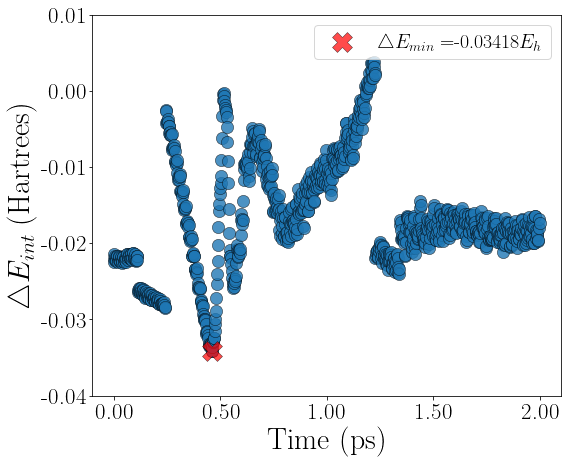

aot-forma2-bg.pdf


In [7]:
import numpy as np
import sys
sys.path.append('../code/')
from herramientas import *
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) 
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"


herr = herramientas()

path_grl0 = "/home/antonio/SIMS/aot-forma2"

plabel = "forma2"

path_salida = os.path.join(path_grl0, "salida.out")
path = path_salida
txt_2find = "Total DFT energy"

N = 30
au2aFactor = 0.5291771057875306

dic2 = defaultdict(dict)

dfxyz_ = pd.DataFrame({})
idy = 0 # frames
f = open(path, 'r')
# f = open(path, 'r', encoding='utf-8')
# fdata = codecs.open(path, 'r', encoding='utf-8', errors='ignore') 

for line in f:
    
    if txt_2find in line:
        energy = line.split()[4]
        dic2["energy"][idy] = float(energy)
    
    if "DFT ENERGY GRADIENTS" in line:
        line = next(f)
        line = next(f)
        line = next(f)
        
        dic = defaultdict(dict)
        
        idx=0
        for i in range(N):
            line = next(f)
            sp = line.split()
            
            ida = sp[0]
            atom = sp[1]
            x = sp[2]
            y = sp[3]
            z = sp[4]
            fx = sp[5]
            fy = sp[6]
            fz = sp[7]
            
            dic["ida"][idx] = ida
            dic["atom"][idx] = atom
            dic["x"][idx] = float(x)*au2aFactor
            dic["y"][idx] = float(y)*au2aFactor
            dic["z"][idx] = float(z)*au2aFactor
            dic["fx"][idx] = float(fx)
            dic["fy"][idx] = float(fy)
            dic["fz"][idx] = float(fz)        
            dic["frame"][idx] = idy  
            
            idx+=1
            
        dfxyz = pd.DataFrame(dic)
        dfxyz_ = pd.concat([dfxyz_, dfxyz], ignore_index=True)        
 
        cm_vMol = herr.get_CM_from_frame(df=dfxyz.loc[24:]).values 
        vS = dfxyz[["x", "y", "z"]].loc[0].values 
        d = np.linalg.norm(cm_vMol - vS)        
        
        dic2["distance"][idy] = float(d)
        
        
        idy+=1
        
        
        
f.close() 

fig = plt.figure()
ax = plt.gca()

df = pd.DataFrame(dic2)

df2 = df.copy()

refP = df2["energy"].iloc[-1]
print(f"refP e[-1]{refP}")

refP = (-1321.244893630513) + (-169.953556352555) # forma E alone no def
print(f"refP A + B: {refP}")

# df2 = df2.loc[5:]
# df2 = df2[(df2["energy"] - refP)  < -0.02 ]

d = df2["distance"].values
e = df2["energy"].values - refP

df_mpkl = dfxyz_.copy()  # <=======


tmp_df = df_mpkl[df_mpkl["frame"] == df.loc[df[['energy']].idxmin()].index[0]].copy()
tmp_df.loc[:,'ida'] = tmp_df['ida'].astype(int)
tmp_df = tmp_df.set_index('ida')

for idx in tmp_df.index:
    
    symbol = tmp_df["atom"].loc[idx]
    x, y, z = tmp_df[["x", "y", "z"]].loc[idx].values
    print(f"{symbol:<10}{x:.7f}{y:15.7f}{z:15.7f}")
    

df.loc[df[['energy']].idxmin()]





markers = ["v", "P", "X", "^"]


df = df.set_index(2*df.index.values/1e3)
df2 = df2.set_index(2*df2.index.values/1e3)

frames = df.index.values

# from
# c = max + (min-max)/2
# so
# c = min +max/2

# c = (df2["energy"].min() + df2["energy"].max())/2.0
# df3 = df2[df2["energy"] < c].copy()

df3 = df2.copy()

frames = df3.index.values
e = df3["energy"].values - refP

# plt.scatter(frames, e, s=150, edgecolors='black', label=f"AOT-MeOH", alpha=0.8, linewidth=0.5)
plt.scatter(frames, e, s=150, edgecolors='black', alpha=0.8, linewidth=0.5)


#################################################


xmin = df.loc[df[['energy']].idxmin()].iloc[0].name
ymin = df.loc[df[['energy']].idxmin()]["energy"].iloc[0]
print(f"ymin {ymin}")
ymin =  ymin - refP
print(f"ymin - refP: {ymin}")

xmin_label = np.round(xmin, decimals=4)
ymin_label = np.round(ymin, decimals=5)

txt1 = r"$t_{min}=$"
txt2 = r"$\triangle E_{min}=$"
# plt.scatter(xmin, ymin, label=f"{txt1}" + f"{xmin_label:.2f} fs, " + f"{txt2}" + f"{ymin_label:.4f}" + "$ E_{h}$",
#             alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)

plt.scatter(xmin, ymin, label=f"{txt2}" + f"{ymin_label:.5f}" + "$ E_{h}$",
            alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)




# plt.scatter(frames, e, s=50, label="B3LYP/6-31G**")


plt.xlabel("Time (ps)", fontsize=30)
plt.ylabel(r"$\triangle E_{int}$  (Hartrees)", fontsize=30)

fw = 6
fh = 5
ff = fw/fh

fh = 7
fw = fh*ff

fig.set_size_inches(fw, fh)

plt.legend(fontsize=20)

###############################333

# xts = ax.get_xticks()[::2]
# sxts = [f'{np.round(xt, decimals=2):.2f}' for xt in xts]
# plt.xticks(xts, sxts, fontsize=23)

yts = ax.get_yticks()[::2]
syts = [f'{np.round(yt, decimals=2):.2f}' for yt in yts]
plt.yticks(yts, syts, fontsize=23)

xts = [0.0, 0.5, 1.0, 1.5, 2.0]
sxts = [f'{np.round(xt, decimals=2):.2f}' for xt in xts]
plt.xticks(xts, sxts, fontsize=23)

####################################


# ax.legend(loc='lower center', fontsize=20,  bbox_to_anchor=(0.3,1.1))
ax.legend(fontsize=20)

plt.show()

name_plot = f"aot-{plabel}-bg-time.pdf"
name_plot = f"aot-{plabel}-bg.pdf"
fig.savefig(name_plot, format="pdf", bbox_inches='tight')
print(name_plot)



# eg

refP e[-1]-1551.611894667788
refP A + B: -1551.574931941711
S         0.0983513      1.4051319     -0.3280030
Na        4.0111582    -11.9914130     -0.5340170
O         -2.7632941     -2.1919802     -0.8832585
O         -0.7236703     -1.4625519      1.6870754
O         -4.3854695     -1.0685287      0.2192354
O         0.8972081     -1.7055119      0.1311640
O         -0.8181247      2.4189093     -0.9892088
O         0.2048714      1.7809990      1.1364983
O         1.3698040      1.1702392     -1.0160465
C         -3.1435845     -1.2055935     -0.2908585
C         -2.3228451      0.0465020     -0.0464337
C         -0.8499405     -0.1843828     -0.3653211
C         -0.2366152     -1.1805941      0.6130644
C         1.5699219     -2.6286005      1.0033113
C         -5.2548583     -2.1976222      0.0281877
H         -2.4442479      0.3464231      0.9980084
H         -2.7163000      0.8489393     -0.6788771
H         -0.7180573     -0.5543829     -1.3843395
H         2.4637576     -2.9

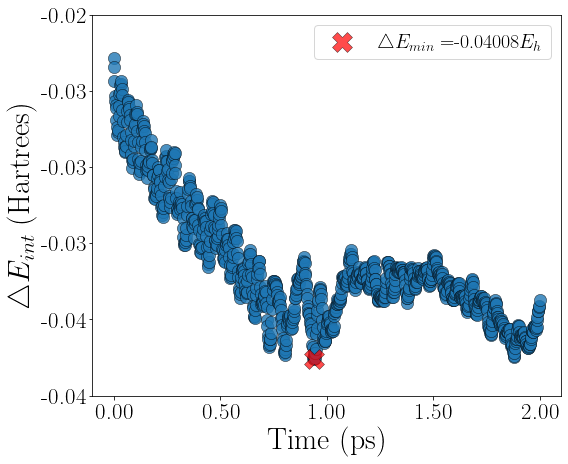

aot-eg2-bg.pdf


In [4]:
import numpy as np
import sys
sys.path.append('../code/')
from herramientas import *
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) 
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"


herr = herramientas()

path_grl0 = "/home/antonio/SIMS/aot-eg-2"

plabel = "eg2"

path_salida = os.path.join(path_grl0, "salida.out")
path = path_salida
txt_2find = "Total DFT energy"

N = 34
au2aFactor = 0.5291771057875306

dic2 = defaultdict(dict)

dfxyz_ = pd.DataFrame({})
idy = 0 # frames
f = open(path, 'r')
# f = open(path, 'r', encoding='utf-8')
# fdata = codecs.open(path, 'r', encoding='utf-8', errors='ignore') 

for line in f:
    
    if txt_2find in line:
        energy = line.split()[4]
        dic2["energy"][idy] = float(energy)
    
    if "DFT ENERGY GRADIENTS" in line:
        line = next(f)
        line = next(f)
        line = next(f)
        
        dic = defaultdict(dict)
        
        idx=0
        for i in range(N):
            line = next(f)
            sp = line.split()
            
            ida = sp[0]
            atom = sp[1]
            x = sp[2]
            y = sp[3]
            z = sp[4]
            fx = sp[5]
            fy = sp[6]
            fz = sp[7]
            
            dic["ida"][idx] = ida
            dic["atom"][idx] = atom
            dic["x"][idx] = float(x)*au2aFactor
            dic["y"][idx] = float(y)*au2aFactor
            dic["z"][idx] = float(z)*au2aFactor
            dic["fx"][idx] = float(fx)
            dic["fy"][idx] = float(fy)
            dic["fz"][idx] = float(fz)        
            dic["frame"][idx] = idy  
            
            idx+=1
            
        dfxyz = pd.DataFrame(dic)
        dfxyz_ = pd.concat([dfxyz_, dfxyz], ignore_index=True)        
 
        cm_vMol = herr.get_CM_from_frame(df=dfxyz.loc[24:]).values 
        vS = dfxyz[["x", "y", "z"]].loc[0].values 
        d = np.linalg.norm(cm_vMol - vS)        
        
        dic2["distance"][idy] = float(d)
        
        
        idy+=1
        
        
        
f.close() 

fig = plt.figure()
ax = plt.gca()

df = pd.DataFrame(dic2)

df2 = df.copy()

refP = df2["energy"].iloc[-1]
print(f"refP e[-1]{refP}")

refP = (-1321.244893630513) + (-230.330038311198) # forma E alone no def
print(f"refP A + B: {refP}")

# df2 = df2.loc[5:]
# df2 = df2[(df2["energy"] - refP)  < -0.02 ]

d = df2["distance"].values
e = df2["energy"].values - refP

df_mpkl = dfxyz_.copy()  # <=======


tmp_df = df_mpkl[df_mpkl["frame"] == df.loc[df[['energy']].idxmin()].index[0]].copy()
tmp_df.loc[:,'ida'] = tmp_df['ida'].astype(int)
tmp_df = tmp_df.set_index('ida')

for idx in tmp_df.index:
    
    symbol = tmp_df["atom"].loc[idx]
    x, y, z = tmp_df[["x", "y", "z"]].loc[idx].values
    print(f"{symbol:<10}{x:.7f}{y:15.7f}{z:15.7f}")
    

df.loc[df[['energy']].idxmin()]





markers = ["v", "P", "X", "^"]


df = df.set_index(2*df.index.values/1e3)
df2 = df2.set_index(2*df2.index.values/1e3)

frames = df.index.values

# from
# c = max + (min-max)/2
# so
# c = min +max/2

# c = (df2["energy"].min() + df2["energy"].max())/2.0
# df3 = df2[df2["energy"] < c].copy()

df3 = df2.copy()

frames = df3.index.values
e = df3["energy"].values - refP

# plt.scatter(frames, e, s=150, edgecolors='black', label=f"AOT-MeOH", alpha=0.8, linewidth=0.5)
plt.scatter(frames, e, s=150, edgecolors='black', alpha=0.8, linewidth=0.5)


#################################################


xmin = df.loc[df[['energy']].idxmin()].iloc[0].name
ymin = df.loc[df[['energy']].idxmin()]["energy"].iloc[0]
print(f"ymin {ymin}")
ymin =  ymin - refP
print(f"ymin - refP: {ymin}")

xmin_label = np.round(xmin, decimals=4)
ymin_label = np.round(ymin, decimals=5)

txt1 = r"$t_{min}=$"
txt2 = r"$\triangle E_{min}=$"
# plt.scatter(xmin, ymin, label=f"{txt1}" + f"{xmin_label:.2f} fs, " + f"{txt2}" + f"{ymin_label:.4f}" + "$ E_{h}$",
#             alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)

plt.scatter(xmin, ymin, label=f"{txt2}" + f"{ymin_label:.5f}" + "$ E_{h}$",
            alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)




# plt.scatter(frames, e, s=50, label="B3LYP/6-31G**")


plt.xlabel("Time (ps)", fontsize=30)
plt.ylabel(r"$\triangle E_{int}$  (Hartrees)", fontsize=30)

fw = 6
fh = 5
ff = fw/fh

fh = 7
fw = fh*ff

fig.set_size_inches(fw, fh)

plt.legend(fontsize=20)

###############################333

# xts, labels = plt.xticks()
# xts = xts[::2]
# sxts = [f'{np.round(xt, decimals=2):.2f}' for xt in xts]
# sxts = [f'{xt:.2f}' for xt in xts]
# plt.xticks(xts, sxts, fontsize=23)

yts, labels = plt.yticks()
yts = yts[::2]
syts = [f'{np.round(yt, decimals=2):.2f}' for yt in yts]
plt.yticks(yts, syts, fontsize=23)

xts = [0.0, 0.5, 1.0, 1.5, 2.0]
sxts = [f'{np.round(xt, decimals=2):.2f}' for xt in xts]
plt.xticks(xts, sxts, fontsize=23)



####################################


# ax.legend(loc='lower center', fontsize=20,  bbox_to_anchor=(0.3,1.1))
ax.legend(fontsize=20)

plt.show()

name_plot = f"aot-{plabel}-bg-time.pdf"
name_plot = f"aot-{plabel}-bg.pdf"
fig.savefig(name_plot, format="pdf", bbox_inches='tight')
print(name_plot)



In [9]:
xts

array([-0.25,  0.25,  0.75,  1.25,  1.75,  2.25])

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

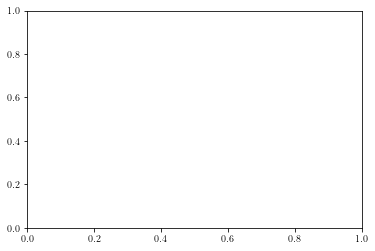

In [16]:
xts, labels = plt.xticks()
labels

['0.00', '0.40', '0.80']

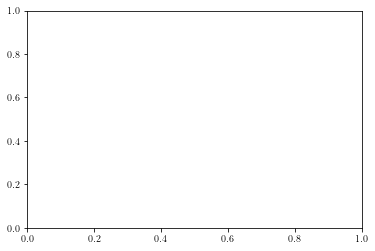

In [7]:
xts, labels = plt.xticks()
xts = xts[::2]
xts
[f'{np.round(xt, decimals=2):.2f}' for xt in xts]

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

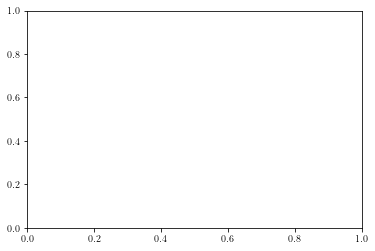

In [3]:
locs, labels = plt.xticks()

locs

In [4]:
locs[::2]
[f'{np.round(xt, decimals=2):.2f}' for xt in xts]

array([0. , 0.4, 0.8])

# agua2

refP e[-1]-1397.737312039932
refP A + B: -1397.702759283228
S         -1.1119509     -2.1266374     -0.3541703
Na        -1.5604766     11.8239105     -0.3929405
O         2.5569515      0.6498300     -0.8713028
O         0.3965055      0.4211043      1.6936117
O         3.8463053     -0.8558413      0.2148734
O         -1.1105147      1.0791943      0.1435276
O         -0.4762483     -3.3288389     -1.0290696
O         -1.3107505     -2.4816226      1.1059087
O         -2.2838120     -1.5738780     -1.0371723
C         2.6785135     -0.4073362     -0.2913840
C         1.5711893     -1.4180391     -0.0606543
C         0.2028643     -0.8233567     -0.3741039
C         -0.1440224      0.2823456      0.6171507
C         -1.5329409      2.1302691      1.0278773
C         4.9700589      0.0230504      0.0358782
H         1.6125757     -1.7513571      0.9799937
H         1.7529791     -2.2856249     -0.7032864
H         0.1686186     -0.4199216     -1.3884888
H         -2.3204845      2.6599

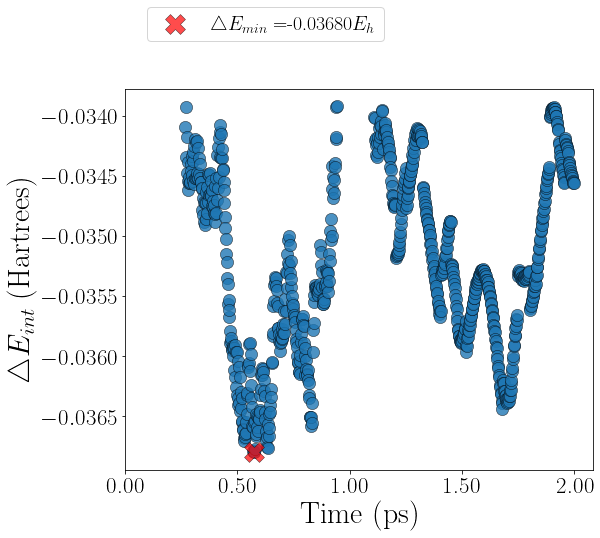

aot-agua2-bg.pdf


In [5]:
import numpy as np
import sys
sys.path.append('../code/')
from herramientas import *
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) 
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"


herr = herramientas()

path_grl0 = "/home/antonio/SIMS/aot-agua2"

plabel = "agua2"

path_salida = os.path.join(path_grl0, "salida.out")
path = path_salida
txt_2find = "Total DFT energy"

N = 27
au2aFactor = 0.5291771057875306

dic2 = defaultdict(dict)

dfxyz_ = pd.DataFrame({})
idy = 0 # frames
f = open(path, 'r')
# f = open(path, 'r', encoding='utf-8')
# fdata = codecs.open(path, 'r', encoding='utf-8', errors='ignore') 

for line in f:
    
    if txt_2find in line:
        energy = line.split()[4]
        dic2["energy"][idy] = float(energy)
    
    if "DFT ENERGY GRADIENTS" in line:
        line = next(f)
        line = next(f)
        line = next(f)
        
        dic = defaultdict(dict)
        
        idx=0
        for i in range(N):
            line = next(f)
            sp = line.split()
            
            ida = sp[0]
            atom = sp[1]
            x = sp[2]
            y = sp[3]
            z = sp[4]
            fx = sp[5]
            fy = sp[6]
            fz = sp[7]
            
            dic["ida"][idx] = ida
            dic["atom"][idx] = atom
            dic["x"][idx] = float(x)*au2aFactor
            dic["y"][idx] = float(y)*au2aFactor
            dic["z"][idx] = float(z)*au2aFactor
            dic["fx"][idx] = float(fx)
            dic["fy"][idx] = float(fy)
            dic["fz"][idx] = float(fz)        
            dic["frame"][idx] = idy  
            
            idx+=1
            
        dfxyz = pd.DataFrame(dic)
        dfxyz_ = pd.concat([dfxyz_, dfxyz], ignore_index=True)        
 
        cm_vMol = herr.get_CM_from_frame(df=dfxyz.loc[24:]).values 
        vS = dfxyz[["x", "y", "z"]].loc[0].values 
        d = np.linalg.norm(cm_vMol - vS)        
        
        dic2["distance"][idy] = float(d)
        
        
        idy+=1
        
        
        
f.close() 

fig = plt.figure()
ax = plt.gca()

df = pd.DataFrame(dic2)

df2 = df.copy()

refP = df2["energy"].iloc[-1]
print(f"refP e[-1]{refP}")

refP = (-1321.244893630513) + (-76.457865652715)
print(f"refP A + B: {refP}")

# df2 = df2.loc[5:]
# df2 = df2[(df2["energy"] - refP)  < -0.02 ]

d = df2["distance"].values
e = df2["energy"].values - refP

df_mpkl = dfxyz_.copy()  # <=======


tmp_df = df_mpkl[df_mpkl["frame"] == df.loc[df[['energy']].idxmin()].index[0]].copy()
tmp_df.loc[:,'ida'] = tmp_df['ida'].astype(int)
tmp_df = tmp_df.set_index('ida')

for idx in tmp_df.index:
    
    symbol = tmp_df["atom"].loc[idx]
    x, y, z = tmp_df[["x", "y", "z"]].loc[idx].values
    print(f"{symbol:<10}{x:.7f}{y:15.7f}{z:15.7f}")
    

df.loc[df[['energy']].idxmin()]





markers = ["v", "P", "X", "^"]


df = df.set_index(2*df.index.values/1e3)
df2 = df2.set_index(2*df2.index.values/1e3)

frames = df.index.values

# from
# c = max + (min-max)/2
# so
# c = min +max/2

c = (df2["energy"].min() + df2["energy"].max())/2.0
df3 = df2[df2["energy"] < c].copy()

# df3 = df2.copy()

frames = df3.index.values
e = df3["energy"].values - refP

# plt.scatter(frames, e, s=150, edgecolors='black', label=f"AOT-MeOH", alpha=0.8, linewidth=0.5)
plt.scatter(frames, e, s=150, edgecolors='black', alpha=0.8, linewidth=0.5)


#################################################


xmin = df.loc[df[['energy']].idxmin()].iloc[0].name
ymin = df.loc[df[['energy']].idxmin()]["energy"].iloc[0]
print(f"ymin {ymin}")
ymin =  ymin - refP
print(f"ymin - refP: {ymin}")

xmin_label = np.round(xmin, decimals=4)
ymin_label = np.round(ymin, decimals=5)

txt1 = r"$t_{min}=$"
txt2 = r"$\triangle E_{min}=$"
# plt.scatter(xmin, ymin, label=f"{txt1}" + f"{xmin_label:.2f} fs, " + f"{txt2}" + f"{ymin_label:.4f}" + "$ E_{h}$",
#             alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)

plt.scatter(xmin, ymin, label=f"{txt2}" + f"{ymin_label:.5f}" + "$ E_{h}$",
            alpha=0.7, c="#ff0000", marker="X", s=400, edgecolors='k', linewidth=0.5)




# plt.scatter(frames, e, s=50, label="B3LYP/6-31G**")


plt.xlabel("Time (ps)", fontsize=30)
plt.ylabel(r"$\triangle E_{int}$  (Hartrees)", fontsize=30)

fw = 6
fh = 5
ff = fw/fh

fh = 7
fw = fh*ff

fig.set_size_inches(fw, fh)

plt.legend(fontsize=20)

###############################333

xts = ax.get_xticks()[::2]
sxts = [f'{np.round(xt, decimals=2):.2f}' for xt in xts]
plt.xticks(xts, sxts, fontsize=23)

yts = ax.get_yticks()[::2]
syts = [f'{np.round(yt, decimals=2):.2f}' for yt in xts]
plt.yticks(fontsize=23)

####################################


ax.legend(loc='lower center', fontsize=20,  bbox_to_anchor=(0.3,1.1))

plt.show()

name_plot = f"aot-{plabel}-bg-time.pdf"
name_plot = f"aot-{plabel}-bg.pdf"
fig.savefig(name_plot, format="pdf", bbox_inches='tight')
print(name_plot)

